<a href="https://colab.research.google.com/github/Clay-the-Great/day-98-data-science-space-race/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import matplotlib.dates as mdates

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/day-98-data-science-space-race/Space+Missions+(start)/mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.iloc[[1]]["Organisation"]

1    CASC
Name: Organisation, dtype: object

In [ ]:
df_data.head()

Unnamed: 0  Unnamed: 0.1 Organisation  \
0           0             0       SpaceX   
1           1             1         CASC   
2           2             2       SpaceX   
3           3             3    Roscosmos   
4           4             4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

In [ ]:
df_data.tail()

Unnamed: 0  Unnamed: 0.1 Organisation  \
4319        4319          4319      US Navy   
4320        4320          4320         AMBA   
4321        4321          4321      US Navy   
4322        4322          4322    RVSN USSR   
4323        4323          4323    RVSN USSR   

                                       Location                        Date  \
4319   LC-18A, Cape Canaveral AFS, Florida, USA  Wed Feb 05, 1958 07:33 UTC   
4320   LC-26A, Cape Canaveral AFS, Florida, USA  Sat Feb 01, 1958 03:48 UTC   
4321   LC-18A, Cape Canaveral AFS, Florida, USA  Fri Dec 06, 1957 16:44 UTC   
4322  Site 1/5, Baikonur Cosmodrome, Kazakhstan  Sun Nov 03, 1957 02:30 UTC   
4323  Site 1/5, Baikonur Cosmodrome, Kazakhstan  Fri Oct 04, 1957 19:28 UTC   

                          Detail  Rocket_Status Price Mission_Status  
4319   Vanguard | Vanguard TV3BU  StatusRetired   NaN        Failure  
4320         Juno I | Explorer 1  StatusRetired   NaN        Success  
4321     Vanguard | Vanguard TV3  StatusRetired   NaN        Failure  
4322  Sputnik 8K71PS | Sputnik-2  StatusRetired   NaN        Success  
4323  Sputnik 8K71PS | Sputnik-1  StatusRetired   NaN        Success

In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df_data = df_data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [ ]:
df_data.dropna(axis = 0, how = 'all', inplace = True)

In [ ]:
df_data.shape

(4324, 7)

In [ ]:
df_data.sample()

Organisation                                 Location  \
2695  Martin Marietta  SLC-4E, Vandenberg AFB, California, USA   

                            Date             Detail  Rocket_Status Price  \
2695  Mon Jun 27, 1977 18:30 UTC  Titan IIID | KH-9  StatusRetired   NaN   

     Mission_Status  
2695        Success

## Descriptive Statistics

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 270.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launches_by_organization = df_data.Organisation.value_counts()

In [ ]:
launches_by_organization.shape

(56,)

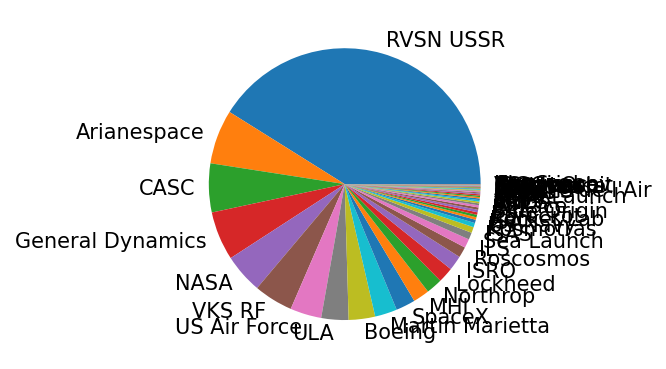

In [ ]:
plt.figure(figsize=(6, 3), dpi=150)
plt.pie(launches_by_organization, labels=launches_by_organization.index)
plt.show()

In [ ]:
fig = px.pie(labels=launches_by_organization.index, values=launches_by_organization.values,
             title="Launches by Organization", names=launches_by_organization.index,)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [ ]:
h_bar = px.bar(x=launches_by_organization.values, y=launches_by_organization.index, orientation='h', title='Launches by Organization')
h_bar.update_layout(xaxis_title='Number of Launches', yaxis_title='Organization')
h_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
active_rockets = df_data[df_data['Rocket_Status'] == "StatusActive"]
active_rockets.shape
print(f"Number of active rockets: {active_rockets.shape[0]}")

Number of active rockets: 790


In [ ]:
retired_rockets = df_data[df_data['Rocket_Status'] == "StatusRetired"]
print(f"Number of decomissioned rockets: {retired_rockets.shape[0]}")

Number of decomissioned rockets: 3534


In [ ]:
3534 + 790

4324

In [ ]:
df_data["Rocket_Status"].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
successful_missions = df_data[df_data["Mission_Status"] == "Success"]
print(f"Number of successful missions: {successful_missions.shape[0]}")

Number of successful missions: 3879


In [ ]:
failed_missions = df_data[df_data["Mission_Status"] == "Failure"]
print(f"Number of failed missions: {failed_missions.shape[0]}")

Number of failed missions: 339


In [ ]:
3879 + 339

4218

In [ ]:
4324 - 4218

106

In [ ]:
not_successful = df_data[df_data["Mission_Status"] != "Success"]
neither = not_successful[not_successful["Mission_Status"] != "Failure"]
neither.shape[0]

106

In [ ]:
neither.sample()

Organisation                                 Location  \
4195  General Dynamics  SLC-3E, Vandenberg AFB, California, USA   

                            Date                       Detail  Rocket_Status  \
4195  Sat Oct 21, 1961 13:53 UTC  Atlas-LV3 Agena-B | Midas 4  StatusRetired   

     Price   Mission_Status  
4195   NaN  Partial Failure

In [ ]:
df_data[df_data["Mission_Status"] == "Partial Failure"].shape[0]

102

In [ ]:
fourth_option = neither[neither["Mission_Status"] != "Partial Failure"]
fourth_option

Organisation                                           Location  \
106           ISA  Imam Khomeini Spaceport, Semnan Space Center, ...   
413        SpaceX           SLC-40, Cape Canaveral AFS, Florida, USA   
1032          AEB  VLS Pad, Alc?›ntara Launch Center, Maranh?œo, ...   
3816    RVSN USSR         Site 31/6, Baikonur Cosmodrome, Kazakhstan   

                            Date                     Detail  Rocket_Status  \
106             Thu Aug 29, 2019        Safir-1B+ | Nahid-1   StatusActive   
413   Thu Sep 01, 2016 13:07 UTC  Falcon 9 Block 3 | AMOS-6  StatusRetired   
1032            Mon Aug 25, 2003      VLS-1 | SATEC, UNOSAT   StatusActive   
3816  Wed Dec 14, 1966 11:27 UTC   Soyuz | Soyuz 7K-OK n†­1  StatusRetired   

     Price     Mission_Status  
106    NaN  Prelaunch Failure  
413   62.0  Prelaunch Failure  
1032   NaN  Prelaunch Failure  
3816   NaN  Prelaunch Failure

In [ ]:
df_data["Mission_Status"].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
prices = df_data[df_data["Price"].notna()].sort_values("Price", ascending=True, inplace=False)
prices.sample()

Organisation                                           Location  \
391  Arianespace  ELV-1 (SLV), Guiana Space Centre, French Guian...   

                           Date               Detail Rocket_Status Price  \
391  Mon Dec 05, 2016 13:51 UTC  Vega | G??kt??rk-1A  StatusActive  37.0   

    Mission_Status  
391        Success

In [ ]:
prices.dtypes

Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

In [ ]:
prices.Price = prices.Price.str.replace(',', '').astype(float)

In [ ]:
prices.Price.dtypes

dtype('float64')

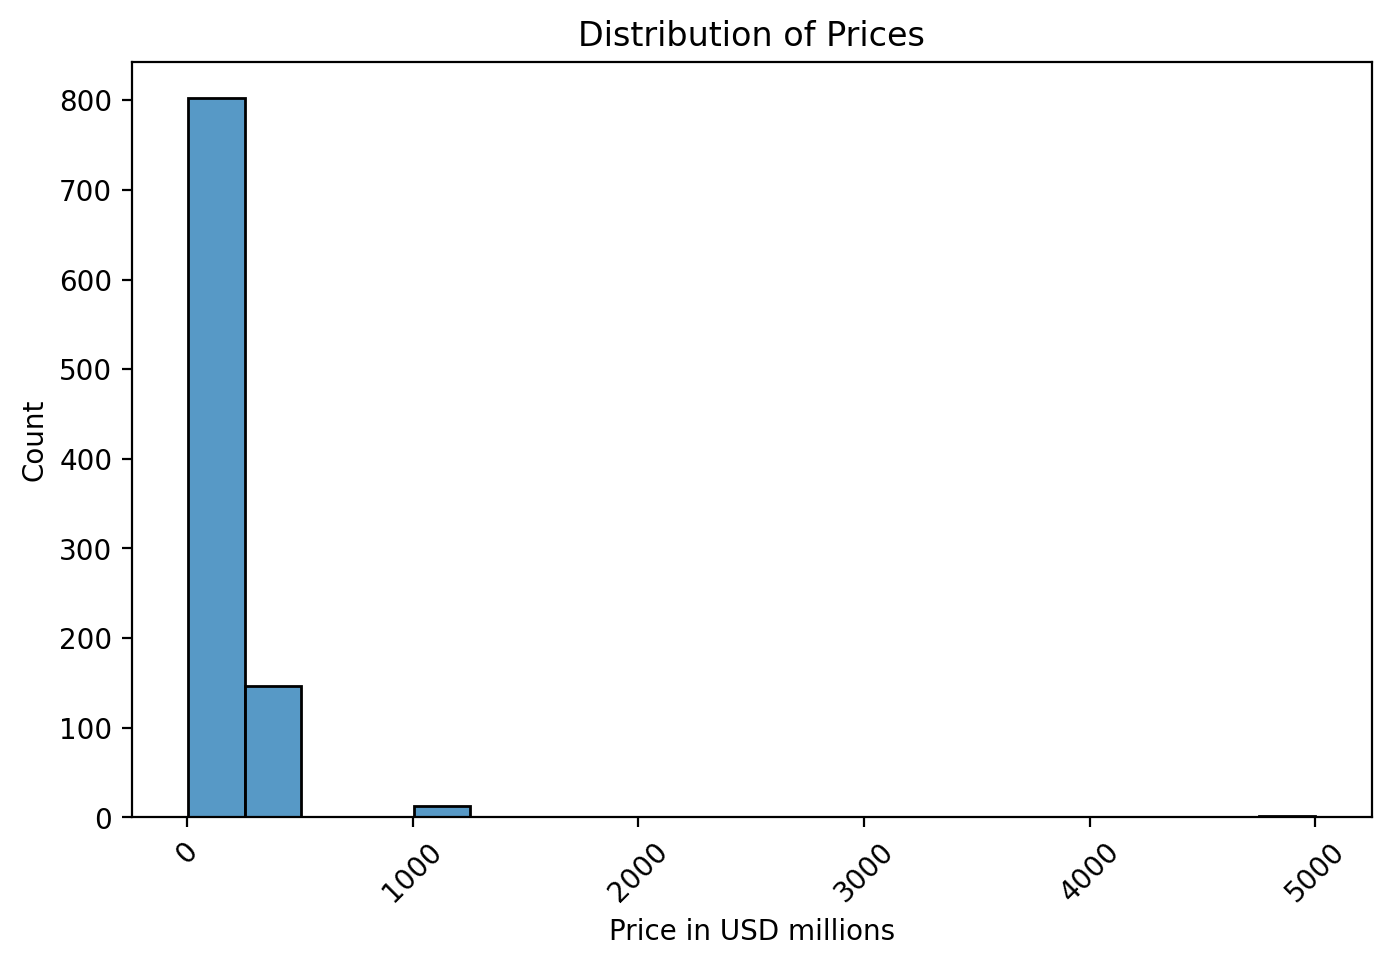

In [ ]:
plt.figure(figsize=(8,5), dpi=200) 
sns.histplot(data=prices, x="Price", bins=20)
plt.title("Distribution of Prices")
plt.xlabel("Price in USD millions")
plt.xticks(rotation=45)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data["Country"] = df_data.Location.str.split(", ").str[-1]

In [ ]:
df_data.Price = df_data.Price.str.replace(',', '').astype(float)

In [ ]:
df_data.Price.isna().values.any()

True

In [ ]:
df_data[df_data.Country == "Russia"].Country = "Russian Federation"

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_data.loc[df_data.Country == "Russia", "Country"] = "Russian Federation"

In [ ]:
a = (df_data.Country == " Russia")
a.values.any()

False

In [ ]:
df_data[df_data.Country == "Russian Federation"].shape

(1395, 8)

In [ ]:
df_data[df_data.Country == "Russian Federation"].sample()

Organisation                                Location  \
1635       VKS RF  Site 43/4, Plesetsk Cosmodrome, Russia   

                            Date                                  Detail  \
1635  Wed Apr 21, 1993 00:23 UTC  Molniya-M /Block ML | Molniya-3 n†­157   

      Rocket_Status  Price Mission_Status             Country  
1635  StatusRetired    NaN        Success  Russian Federation

In [ ]:
df_data[df_data.Country == "Russia"].shape

(0, 8)

In [ ]:
df_data.loc[df_data.Country == "New Mexico", "Country"] = "USA"

In [ ]:
df_data.loc[df_data.Country == "Yellow Sea", "Country"] = "China"

In [ ]:
df_data.loc[df_data.Country == "Shahrud Missile Test Site", "Country"] = "Iran"

In [ ]:
df_data.loc[df_data.Country == "Pacific Missile Range Facility", "Country"] = "USA"

In [ ]:
df_data.loc[df_data.Country == "Barents Sea", "Country"] = "Russian Federation"

In [ ]:
df_data.loc[df_data.Country == "Gran Canaria", "Country"] = "USA"

In [ ]:
name_to_code = {}
for country in countries:
  name_to_code[country.name] = country.alpha3
name_to_code["USA"] = "USA"

In [ ]:
name_to_code["Canada"]

'CAN'

In [ ]:
df_data["Country_code"] = df_data.Country

In [ ]:
df_data = df_data.replace({"Country_code": name_to_code})

In [ ]:
launches_by_country = df_data[["Country", "Country_code"]].value_counts(dropna=True, sort=True).rename_axis(["Country_name", "Country_code"]).reset_index(name="Launches")

In [ ]:
launches_by_country.head()

Country_name Country_code  Launches
0  Russian Federation          RUS      1398
1                 USA          USA      1351
2          Kazakhstan          KAZ       701
3              France          FRA       303
4               China          CHN       269

In [ ]:
launches_by_country[launches_by_country.Country_name == "Iran"]

Country_name Country_code  Launches
8         Iran         Iran        14

In [ ]:
figure = px.choropleth(launches_by_country, locations="Country_code",
                       color="Launches",
                       hover_name="Country_name",
                       color_continuous_scale=px.colors.sequential.Plasma)
figure.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
failures = df_data[df_data.Mission_Status != "Success"][["Country", "Country_code"]].value_counts(dropna=True, sort=True).rename_axis(["Country_name", "Country_code"]).reset_index(name="Failed_launches")

In [ ]:
failures.sample()

Country_name Country_code  Failed_launches
10  North Korea  North Korea                3

In [ ]:
figure = px.choropleth(failures, locations="Country_code",
                       color="Failed_launches",
                       hover_name="Country_name",
                       color_continuous_scale=px.colors.sequential.Plasma)
figure.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
burst_data = df_data.groupby(["Country", "Organisation", "Mission_Status"]).Detail.agg(["count"])

In [ ]:
burst_data = burst_data.rename_axis(["Country_name", "Organization", "Mission_Status"]).reset_index()
# question: I can't pass a name argument to .reset_index() method here, but it can be done previously in cell 64, why?

In [ ]:
burst_data.head()

Country_name Organization Mission_Status  count
0    Australia         AMBA        Success      1
1    Australia       CECLES        Failure      2
2    Australia       CECLES        Success      1
3    Australia          RAE        Failure      1
4    Australia          RAE        Success      1

In [ ]:
fig = px.sunburst(
    burst_data, path=["Country_name", "Organization", "Mission_Status"],
    values="count",
    hover_data=["Country_name"],
    # color="count",
    # color_continuous_scale='RdBu',
                  )
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
money_by_organization = df_data[df_data.Price.notna()].groupby(["Country", "Organisation"]).Price.agg(["sum"])

In [ ]:
money_by_organization.head()

sum
Country Organisation          
China   CASC          6,340.26
        ExPace           28.30
France  Arianespace  16,248.00
        ESA              37.00
India   ISRO          2,177.00

In [ ]:
money_by_organization = money_by_organization.rename_axis(["Country_name", "Organization"]).reset_index()

In [ ]:
money_by_organization.head()

Country_name Organization       sum
0        China         CASC  6,340.26
1        China       ExPace     28.30
2       France  Arianespace 16,248.00
3       France          ESA     37.00
4        India         ISRO  2,177.00

In [ ]:
figure = px.sunburst(
    money_by_organization,
    path=["Country_name", "Organization"],
    values="sum",
    hover_data=["Country_name"],
)
figure.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
per_launch = df_data[df_data.Price.notna()][["Country", "Organisation", "Detail", "Price"]].groupby(["Country", "Organisation"])

In [ ]:
per_launch.head()
# For later: how to make the rows of the same country appear together?

Country  Organisation  \
0            USA        SpaceX   
1          China          CASC   
3     Kazakhstan     Roscosmos   
4            USA           ULA   
5          China          CASC   
...          ...           ...   
3554         USA  US Air Force   
3563         USA  US Air Force   
3583         USA  US Air Force   
3595         USA  US Air Force   
3609         USA  US Air Force   

                                                 Detail  Price  
0          Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  50.00  
1                   Long March 2D | Gaofen-9 04 & Q-SAT  29.75  
3          Proton-M/Briz-M | Ekspress-80 & Ekspress-103  65.00  
4                            Atlas V 541 | Perseverance 145.00  
5     Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...  64.68  
...                                                 ...    ...  
3554                              Titan IIIB | OPS 1077  59.00  
3563                              Titan IIIB | OPS 5310  59.00  
3583                              Titan IIIB | OPS 4248  59.00  
3595                              Titan IIIB | OPS 7585  59.00  
3609                              Titan IIIB | OPS 6518  59.00  

[120 rows x 4 columns]

# Chart the Number of Launches per Year

In [ ]:
df_data.head(3)

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   

  Rocket_Status  Price Mission_Status Country Country_code  
0  StatusActive  50.00        Success     USA          USA  
1  StatusActive  29.75        Success   China          CHN  
2  StatusActive    NaN        Success     USA          USA

In [ ]:
df_data["Year"] = df_data.Date.str.split(", ").str[1].str.split(" ").str[0]

In [ ]:
df_data.sample()

Organisation                                Location  \
3091    RVSN USSR  Site 43/4, Plesetsk Cosmodrome, Russia   

                            Date                Detail  Rocket_Status  Price  \
3091  Sat Nov 10, 1973 12:38 UTC  Voskhod | Cosmos 607  StatusRetired    NaN   

     Mission_Status             Country Country_code  Year  
3091        Success  Russian Federation          RUS  1973

In [ ]:
launches_by_year = df_data.groupby("Year").Detail.agg(["count"]).rename_axis(["Year"]).reset_index()

In [ ]:
launches_by_year.head()

Year  count
0  1957      3
1  1958     28
2  1959     20
3  1960     39
4  1961     52

In [ ]:
h_bar = px.bar(data_frame=launches_by_year, x=launches_by_year["count"], y=launches_by_year.Year, orientation='h', title='Launches by Year Worldwide')
h_bar.update_layout(xaxis_title='Number of Launches', yaxis_title='Year')
h_bar.show()

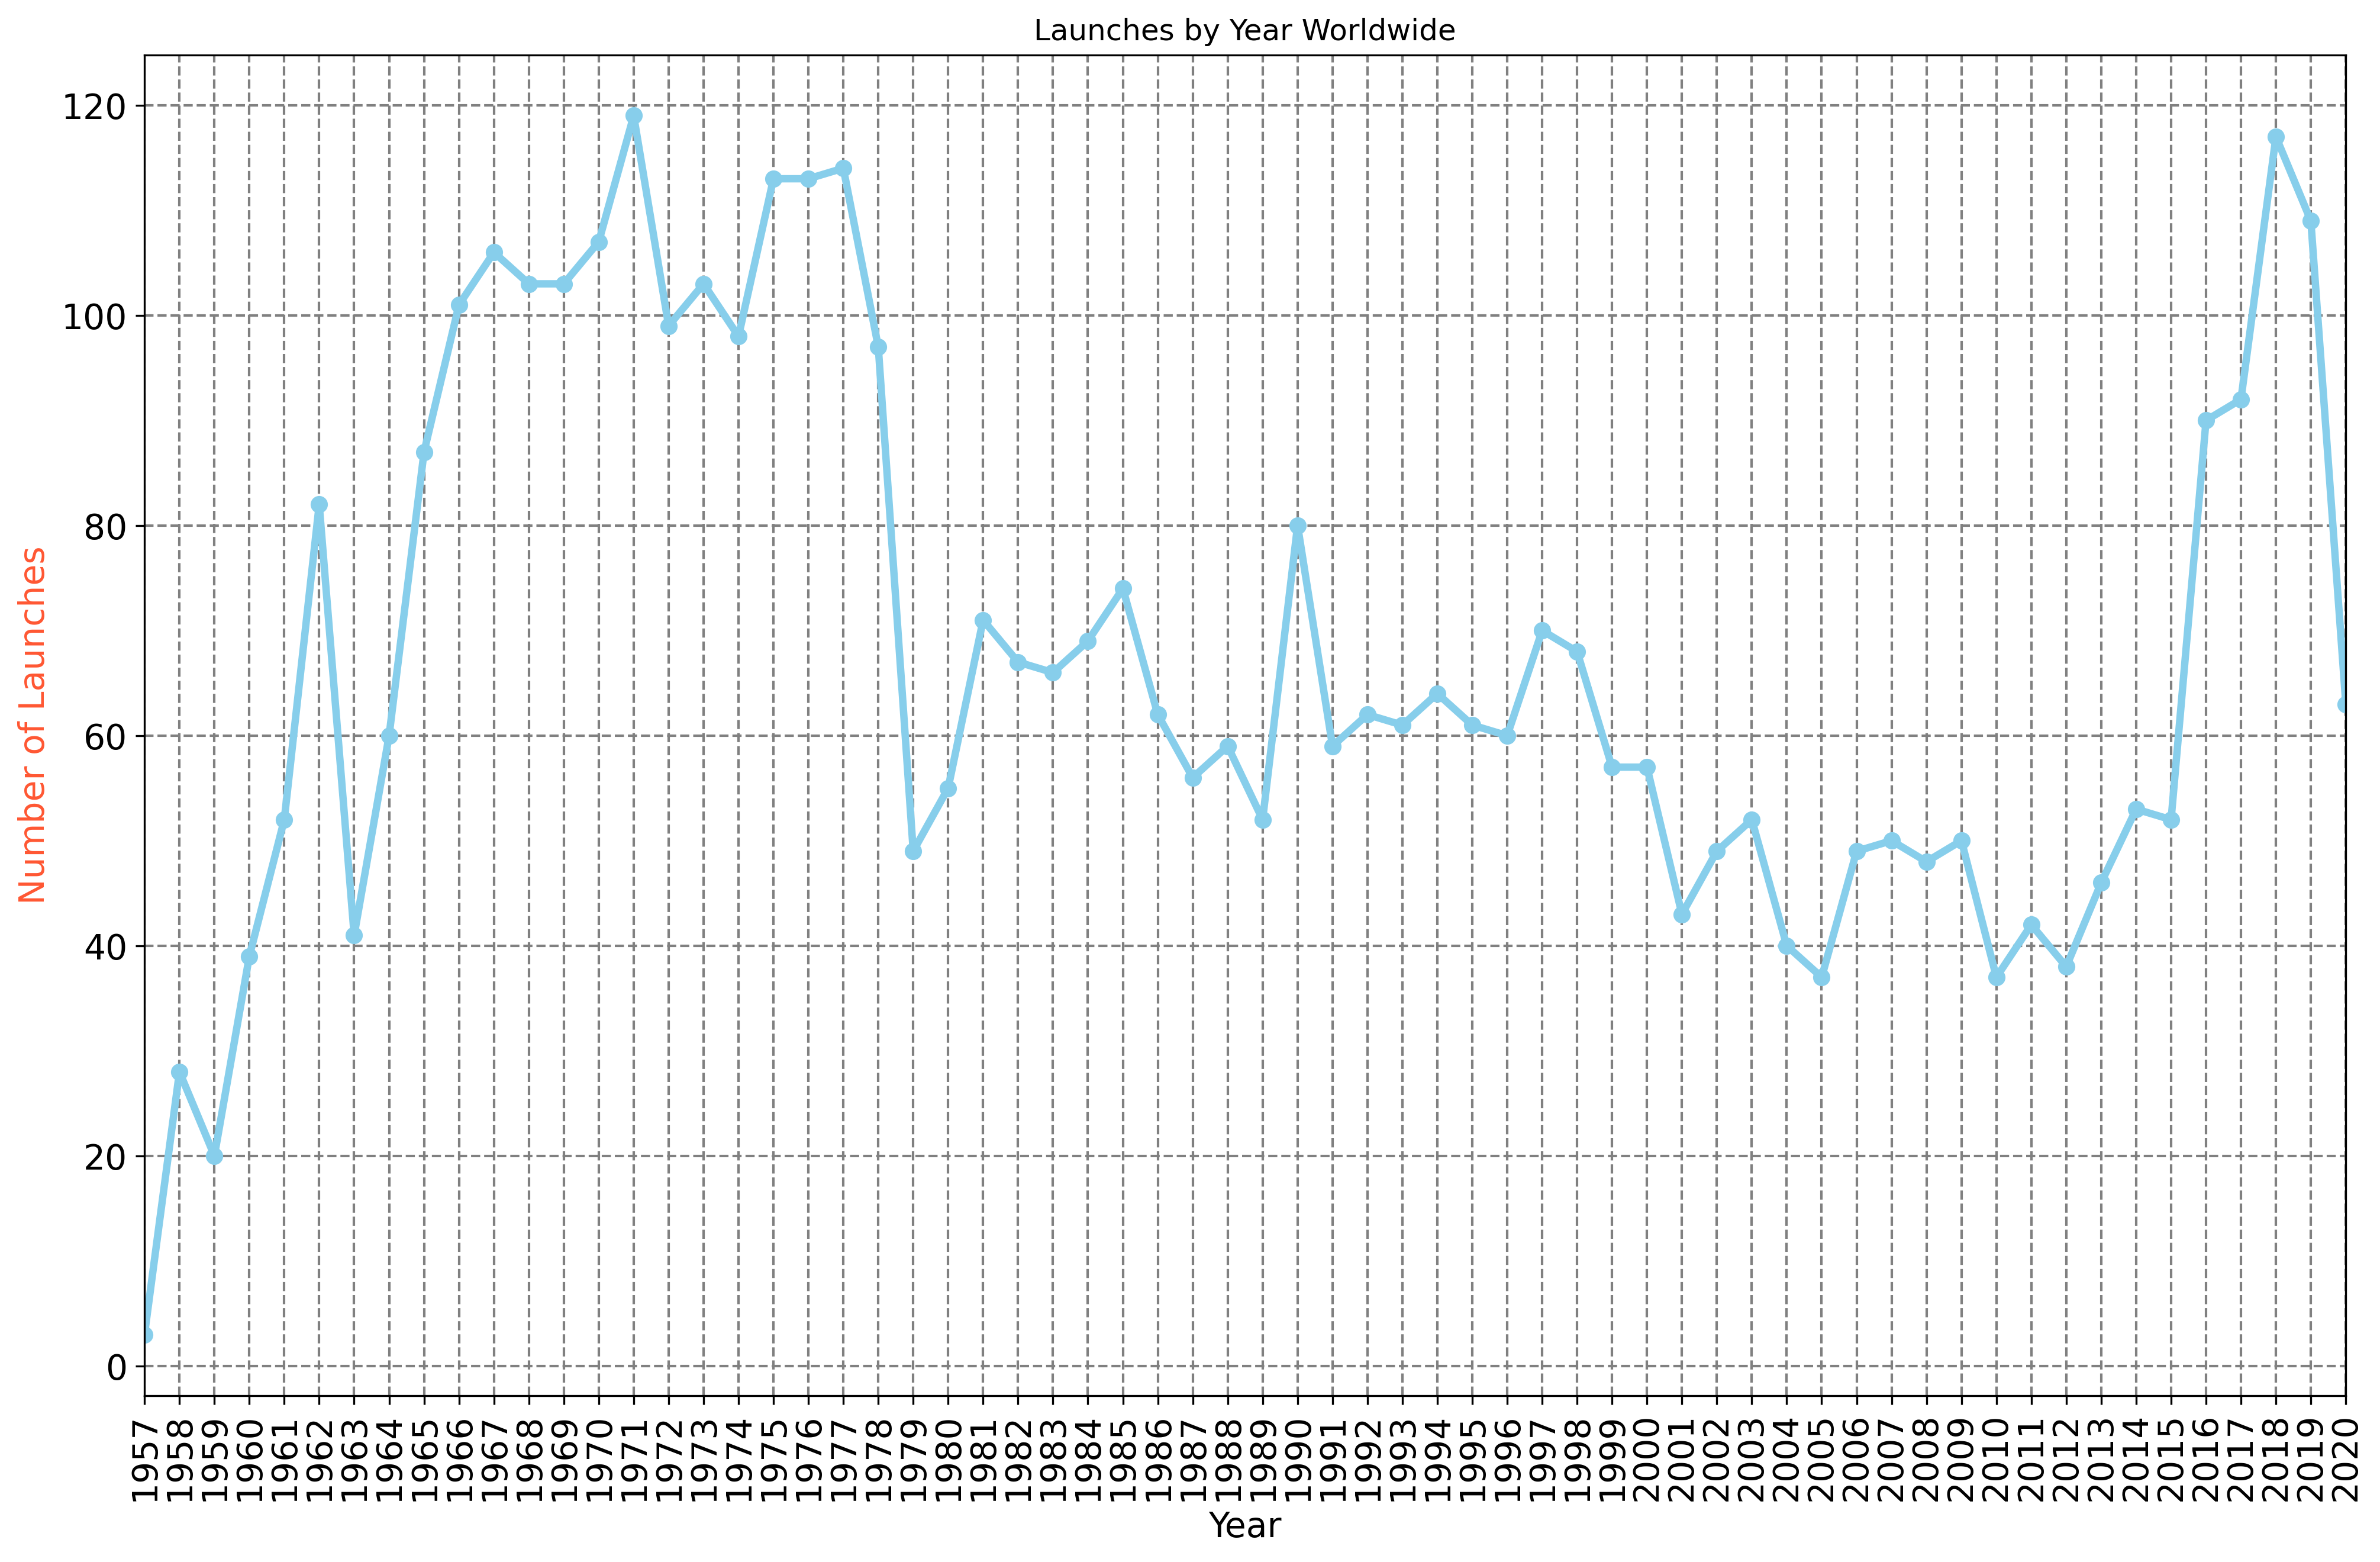

In [ ]:
plt.figure(figsize=(16,10), dpi=300) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90)
plt.title("Launches by Year Worldwide")

plt.plot(launches_by_year["Year"], launches_by_year["count"], linewidth=3, color="skyblue", marker="o")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", color="#FF5733", fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
plt.xlim(launches_by_year["Year"].min(), launches_by_year["Year"].max())

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
df_data.sample()

Organisation                                           Location  \
872  Arianespace  ELA-3, Guiana Space Centre, French Guiana, France   

                           Date                               Detail  \
872  Fri May 04, 2007 22:29 UTC  Ariane 5 ECA | Astra 1L & Galaxy 17   

    Rocket_Status  Price Mission_Status Country Country_code  Year  
872  StatusActive 200.00        Success  France          FRA  2007

In [ ]:
df_data["Day"] = df_data.Date.str.split(", ").str[0].str.split(" ").str[1]

In [ ]:
df_data.sample()

Organisation                                          Location  \
4176  US Air Force  SLC-1E (75-3-5), Vandenberg AFB, California, USA   

                            Date                         Detail  \
4176  Wed Feb 21, 1962 18:44 UTC  Thor DM-21 Agena-B | FTV 2301   

      Rocket_Status  Price   Mission_Status Country Country_code  Year  Day  
4176  StatusRetired    NaN  Partial Failure     USA          USA  1962  Feb

In [ ]:
df_data.Date.str.len().tail(20)

4304    16
4305    26
4306    16
4307    26
4308    16
4309    26
4310    16
4311    26
4312    26
4313    26
4314    26
4315    26
4316    26
4317    26
4318    26
4319    26
4320    26
4321    26
4322    26
4323    26
Name: Date, dtype: int64

In [ ]:
date_time = df_data.Date.str.split(" ", n=1).str[1]

In [ ]:
date_time = date_time.where(date_time.str.len() == 12, other=date_time.str.rsplit(" UTC").str[0].str.rsplit(" ", 1).str[0])

In [ ]:
date_time.str.len().tail(20)

4304    12
4305    12
4306    12
4307    12
4308    12
4309    12
4310    12
4311    12
4312    12
4313    12
4314    12
4315    12
4316    12
4317    12
4318    12
4319    12
4320    12
4321    12
4322    12
4323    12
Name: Date, dtype: int64

In [ ]:
date_time.tail(20)

4304    Aug 25, 1958
4305    Aug 24, 1958
4306    Aug 22, 1958
4307    Aug 17, 1958
4308    Aug 12, 1958
4309    Jul 26, 1958
4310    Jul 25, 1958
4311    Jun 26, 1958
4312    May 28, 1958
4313    May 15, 1958
4314    Apr 28, 1958
4315    Apr 27, 1958
4316    Mar 26, 1958
4317    Mar 17, 1958
4318    Mar 05, 1958
4319    Feb 05, 1958
4320    Feb 01, 1958
4321    Dec 06, 1957
4322    Nov 03, 1957
4323    Oct 04, 1957
Name: Date, dtype: object

In [ ]:
df_data["Day"] = pd.to_datetime(date_time, format="%b %d, %Y")

In [ ]:
df_data.dtypes

Organisation              object
Location                  object
Date                      object
Detail                    object
Rocket_Status             object
Price                    float64
Mission_Status            object
Country                   object
Country_code              object
Year                      object
Day               datetime64[ns]
dtype: object

In [ ]:
df_data.rename(columns={"Day": "Date_time"}, inplace=True)

In [ ]:
launches_by_month = df_data.groupby([df_data.Date_time.dt.year, df_data.Date_time.dt.month]).Detail.agg(["count"]).rename_axis(["Year", "Month"]).reset_index()

In [ ]:
launches_by_month["Date"] = pd.to_datetime(launches_by_month[['Year', 'Month']].assign(DAY=1))

In [ ]:
launches_by_month.head(20)

Year  Month  count       Date
0   1957     10      1 1957-10-01
1   1957     11      1 1957-11-01
2   1957     12      1 1957-12-01
3   1958      2      2 1958-02-01
4   1958      3      3 1958-03-01
5   1958      4      2 1958-04-01
6   1958      5      2 1958-05-01
7   1958      6      1 1958-06-01
8   1958      7      2 1958-07-01
9   1958      8      7 1958-08-01
10  1958      9      2 1958-09-01
11  1958     10      3 1958-10-01
12  1958     11      1 1958-11-01
13  1958     12      3 1958-12-01
14  1959      1      1 1959-01-01
15  1959      2      2 1959-02-01
16  1959      4      2 1959-04-01
17  1959      6      4 1959-06-01
18  1959      8      3 1959-08-01
19  1959      9      4 1959-09-01

In [ ]:
launches_by_month["rolling_average"] = launches_by_month["count"].rolling(12).mean()

In [ ]:
launches_by_month.sample()

Year  Month  count       Date  rolling_average
587  2007      3      3 2007-03-01             4.08

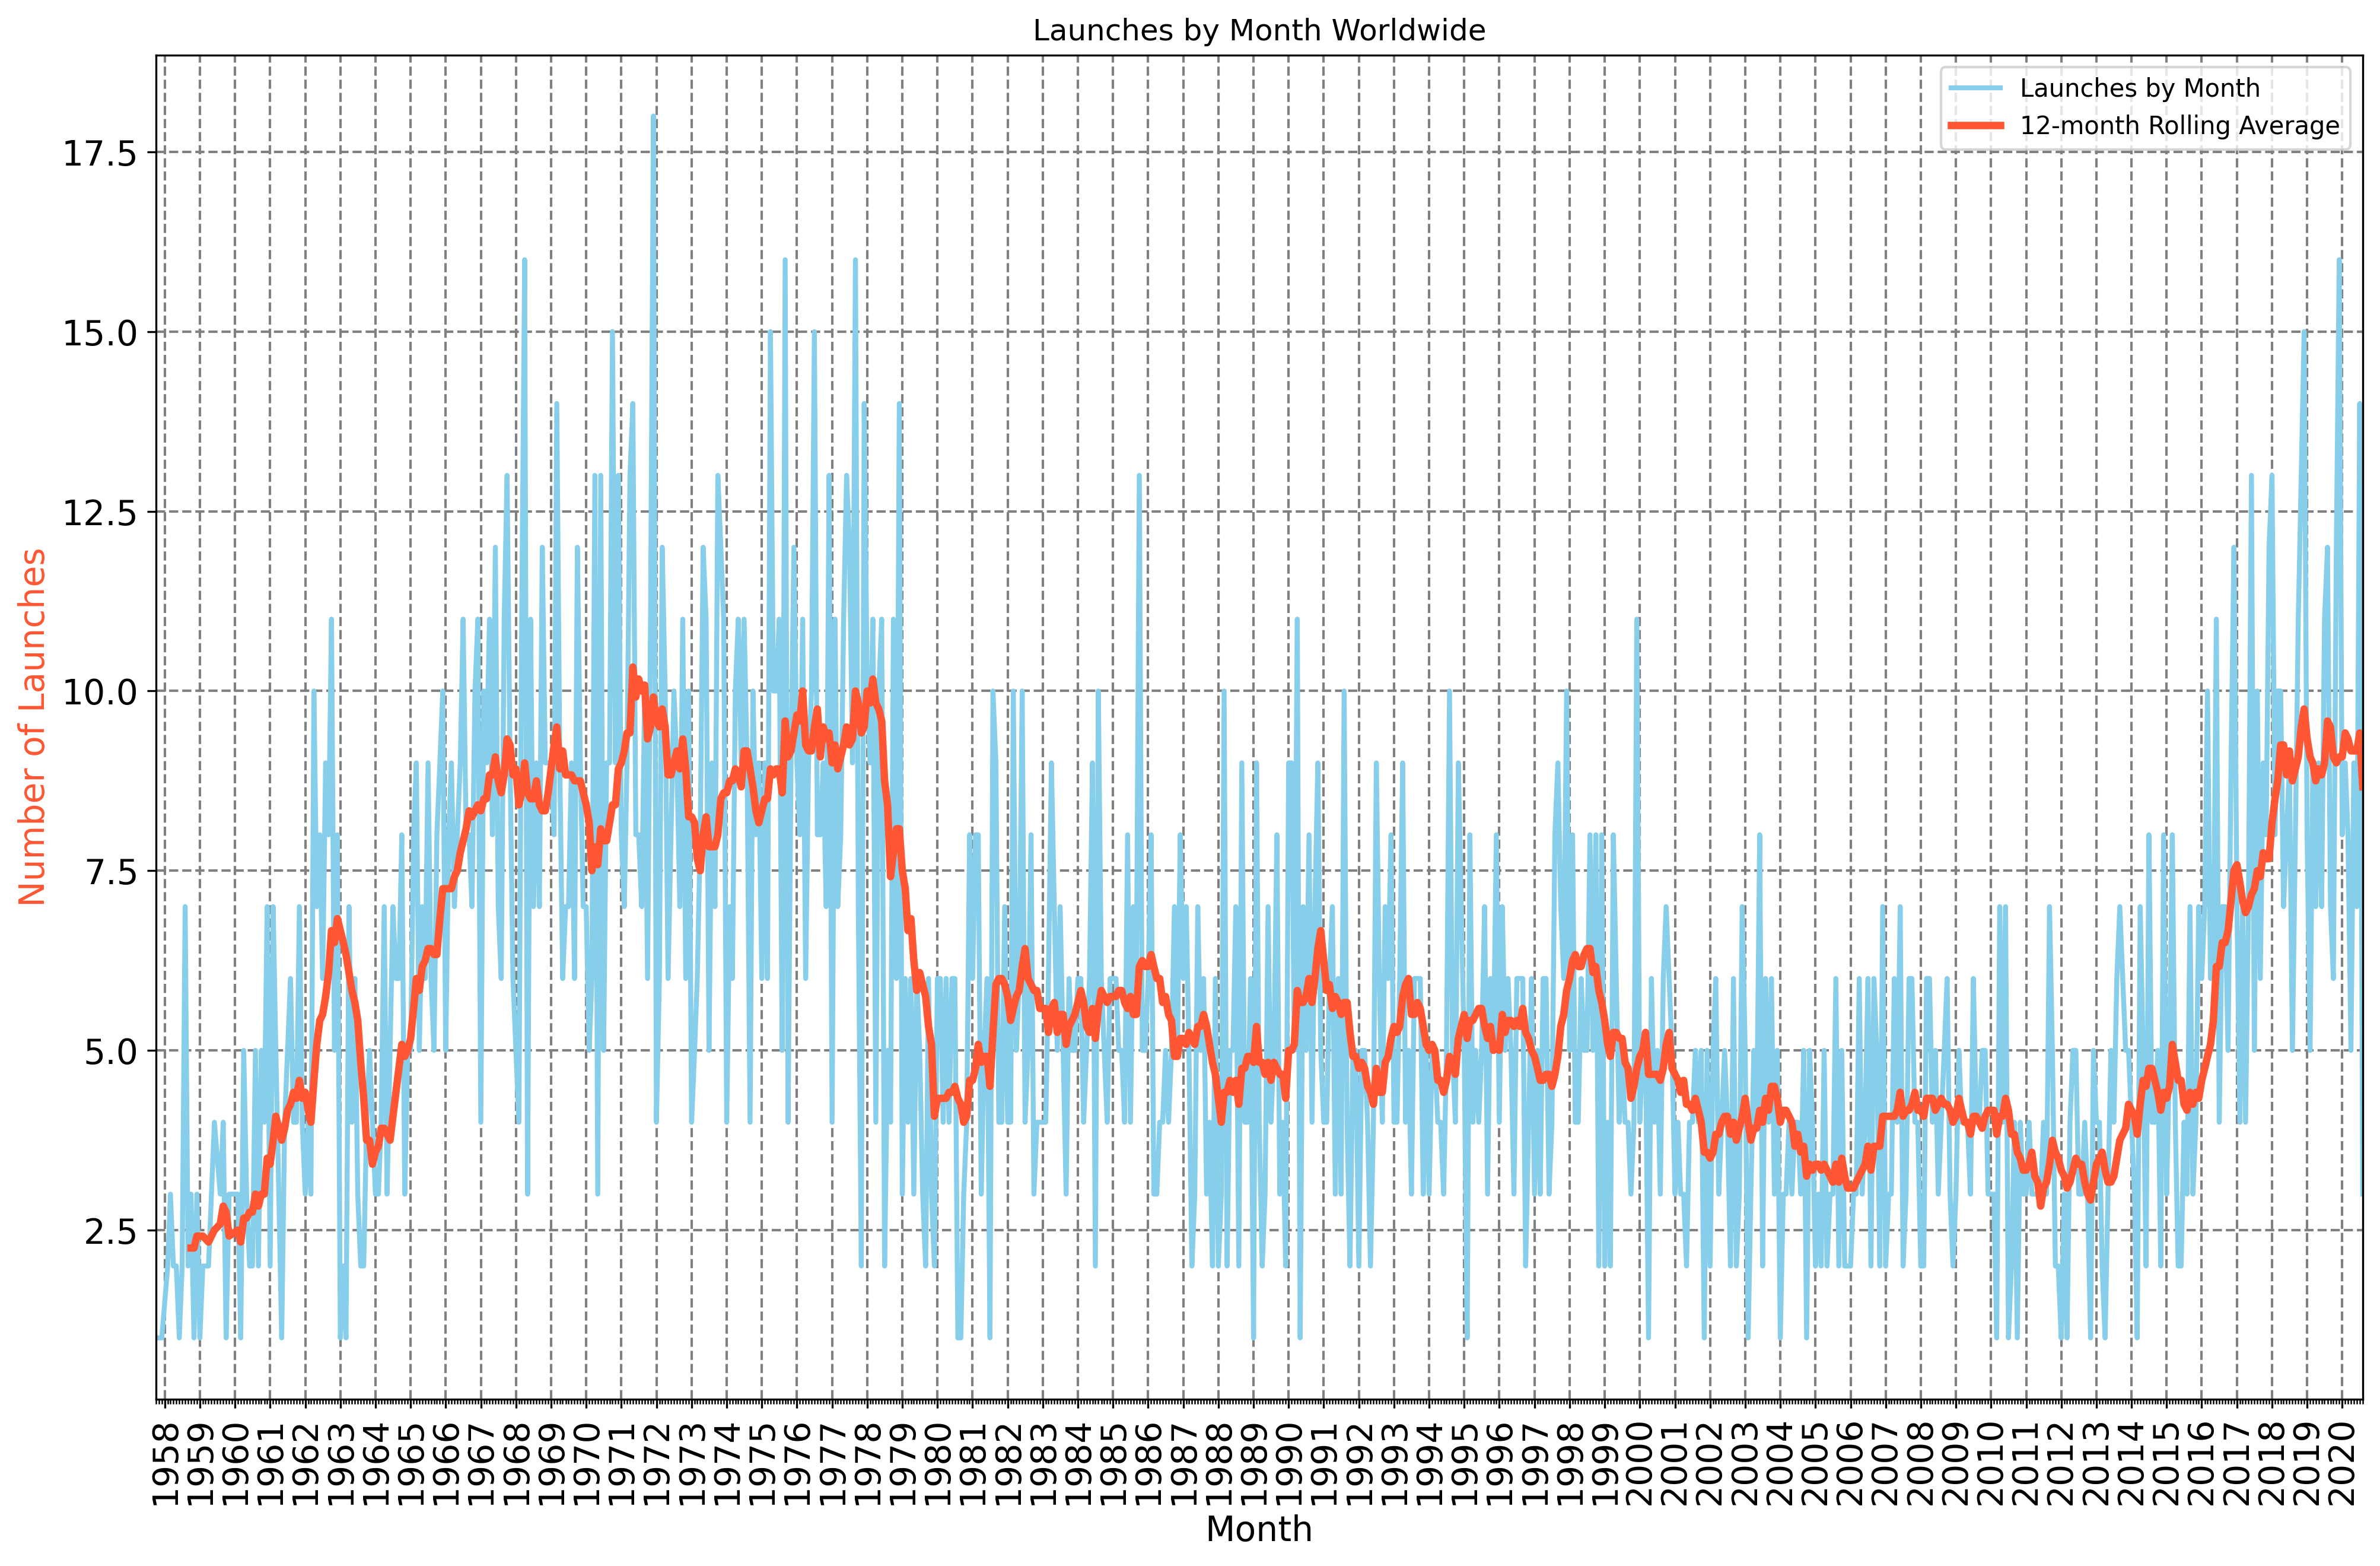

In [ ]:
plt.figure(figsize=(16,10), dpi=300) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90)
plt.title("Launches by Month Worldwide")

plt.plot(launches_by_month.Date, launches_by_month["count"], linewidth=2, color="skyblue", marker="", label="Launches by Month")
plt.plot(launches_by_month.Date, launches_by_month.rolling_average, linewidth=3, color="#FF5733", label="12-month Rolling Average")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Launches", color="#FF5733", fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
plt.xlim(launches_by_month["Date"].min(), launches_by_month["Date"].max())
plt.legend(loc="upper right")

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

axis = plt.gca()
axis.xaxis.set_major_locator(years)
axis.xaxis.set_major_formatter(years_fmt)
axis.xaxis.set_minor_locator(months)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
launches_by_month.sort_values(by="count", ascending=True, inplace=False).head()

Year  Month  count       Date  rolling_average
0    1957     10      1 1957-10-01              NaN
385  1990      5      1 1990-05-01             5.67
23   1960      3      1 1960-03-01             2.33
622  2010      3      1 2010-03-01             3.83
659  2013      4      1 2013-04-01             3.33

In [ ]:
launches_by_month.sort_values(by="count", ascending=True).tail()

Year  Month  count       Date  rolling_average
738  2019     12     16 2019-12-01             9.08
209  1975      9     16 1975-09-01             9.58
120  1968      4     16 1968-04-01             9.00
233  1977      9     16 1977-09-01            10.00
164  1971     12     18 1971-12-01             9.92

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
df_data.sample()

Organisation                                 Location  \
2687    RVSN USSR  Site 132/1, Plesetsk Cosmodrome, Russia   

                            Date                           Detail  \
2687  Wed Jul 13, 1977 05:02 UTC  Cosmos-3M (11K65M) | Cosmos 928   

      Rocket_Status  Price Mission_Status             Country Country_code  \
2687  StatusRetired    NaN        Success  Russian Federation          RUS   

      Year  Date_time  
2687  1977 1977-07-13

In [ ]:
price_rolling_average = df_data[df_data["Price"].notna()][["Date_time", "Price"]]

In [ ]:
price_rolling_average["Average_price"] = price_rolling_average["Price"].rolling(10).mean()

In [ ]:
price_rolling_average.tail()

Date_time  Price  Average_price
3855 1966-07-29  59.00         169.10
3971 1965-05-06  63.23          59.42
3993 1965-02-11  63.23          59.85
4000 1964-12-10  63.23          60.27
4020 1964-09-01  63.23          60.69

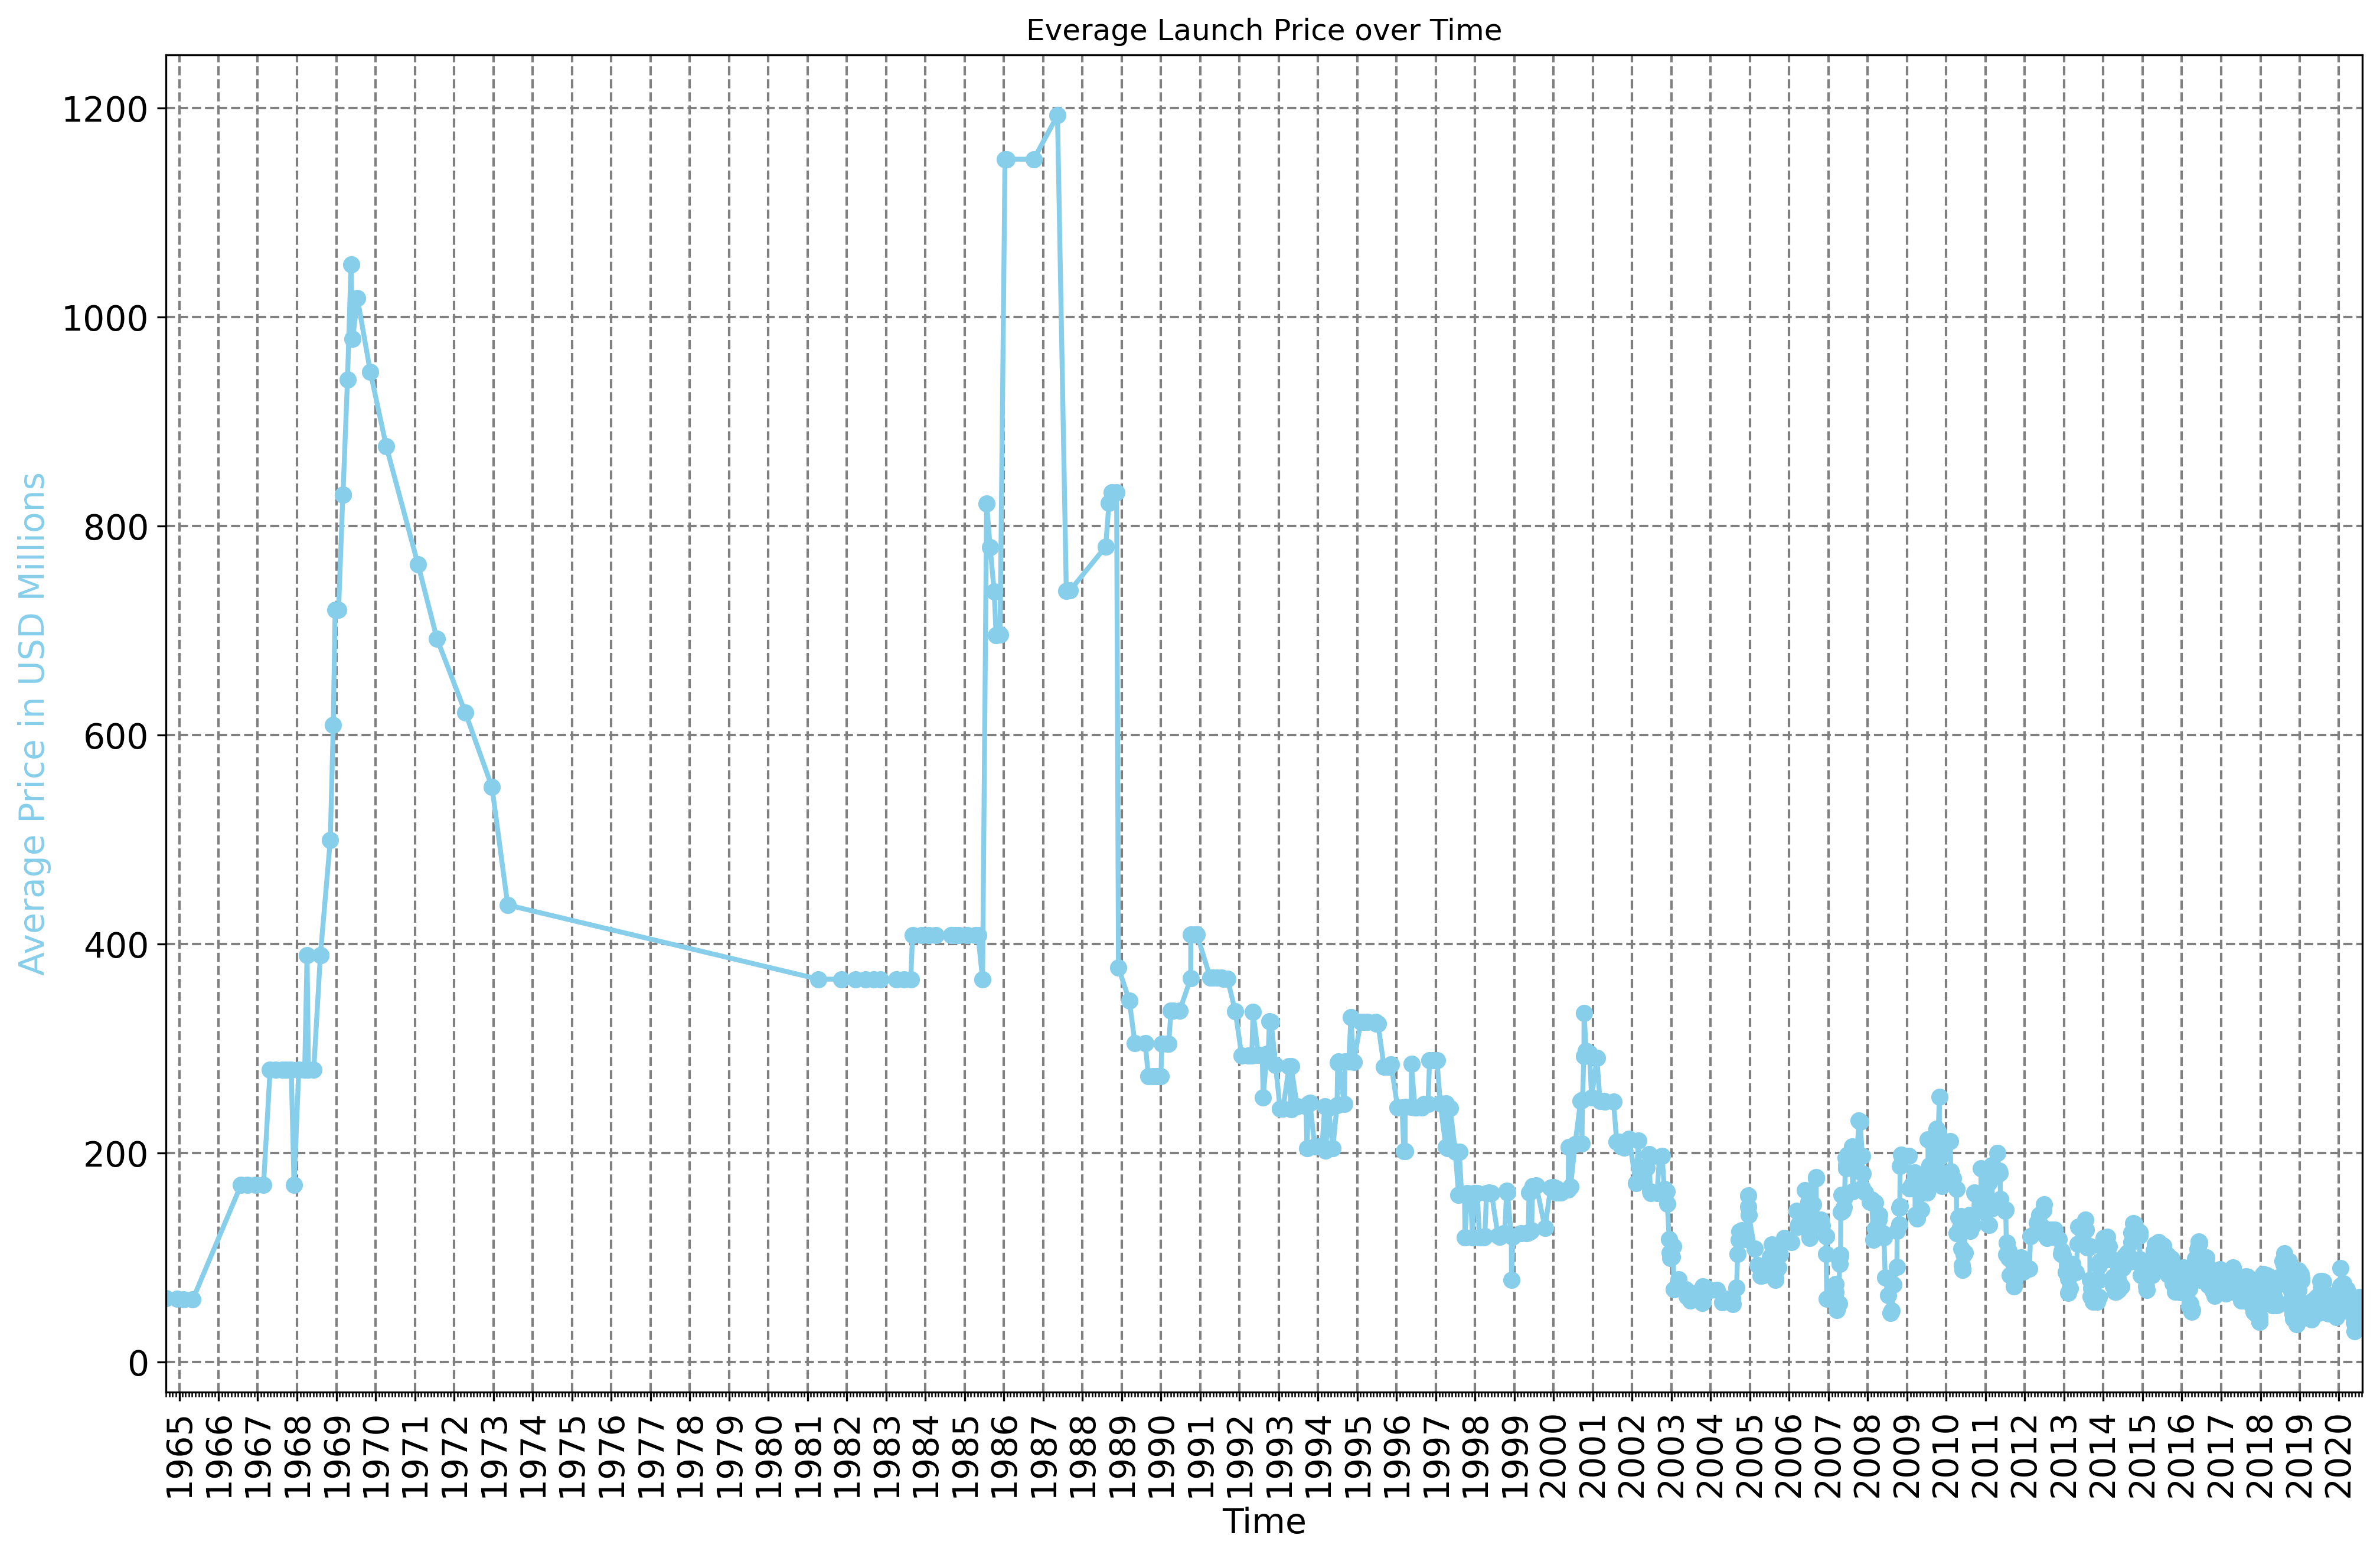

In [ ]:
plt.figure(figsize=(16,10), dpi=300) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90)
plt.title("Everage Launch Price over Time")

plt.plot(price_rolling_average.Date_time, price_rolling_average["Average_price"], linewidth=2, color="skyblue", marker="o")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Average Price in USD Millions", color="skyblue", fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
plt.xlim(price_rolling_average["Date_time"].min(), price_rolling_average["Date_time"].max())

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

axis = plt.gca()
axis.xaxis.set_major_locator(years)
axis.xaxis.set_major_formatter(years_fmt)
axis.xaxis.set_minor_locator(months)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
top_10_organizations = df_data.groupby("Organisation").Detail.agg(["count"]).sort_values("count", ascending=False).head(10)

In [ ]:
top_10_organizations = top_10_organizations.rename_axis(["Organization"]).reset_index()

In [ ]:
top_10_organizations

Organization  count
0         RVSN USSR   1777
1       Arianespace    279
2  General Dynamics    251
3              CASC    251
4              NASA    203
5            VKS RF    201
6      US Air Force    161
7               ULA    140
8            Boeing    136
9   Martin Marietta    114

In [ ]:
organization_data = df_data[df_data["Organisation"].isin(top_10_organizations["Organization"])]

In [ ]:
organization_data = organization_data.groupby([organization_data.Organisation, organization_data.Date_time.dt.year]).Detail.agg("count").rename_axis(["Organization", "Year"]).reset_index()

In [ ]:
organization_data.rename(columns={"Detail": "Launches"}, inplace=True)

In [ ]:
organization_data.head(10)

Organization  Year  Launches
0  Arianespace  1984         3
1  Arianespace  1985         4
2  Arianespace  1986         3
3  Arianespace  1987         2
4  Arianespace  1988         6
5  Arianespace  1989         7
6  Arianespace  1990         6
7  Arianespace  1991         8
8  Arianespace  1992         7
9  Arianespace  1993         7

In [ ]:
pivoted = organization_data.pivot(index="Year", values="Launches", columns="Organization")

In [ ]:
pivoted.head()

Organization  Arianespace  Boeing  CASC  General Dynamics  Martin Marietta  \
Year                                                                         
1957                  NaN     NaN   NaN               NaN              NaN   
1958                  NaN     NaN   NaN               NaN              NaN   
1959                  NaN     NaN   NaN              1.00              NaN   
1960                  NaN     NaN   NaN              5.00              NaN   
1961                  NaN     NaN   NaN              8.00              NaN   

Organization  NASA  RVSN USSR  ULA  US Air Force  VKS RF  
Year                                                      
1957           NaN       2.00  NaN           NaN     NaN  
1958          2.00       5.00  NaN          2.00     NaN  
1959          1.00       4.00  NaN         10.00     NaN  
1960          4.00       9.00  NaN         21.00     NaN  
1961         12.00       9.00  NaN         23.00     NaN

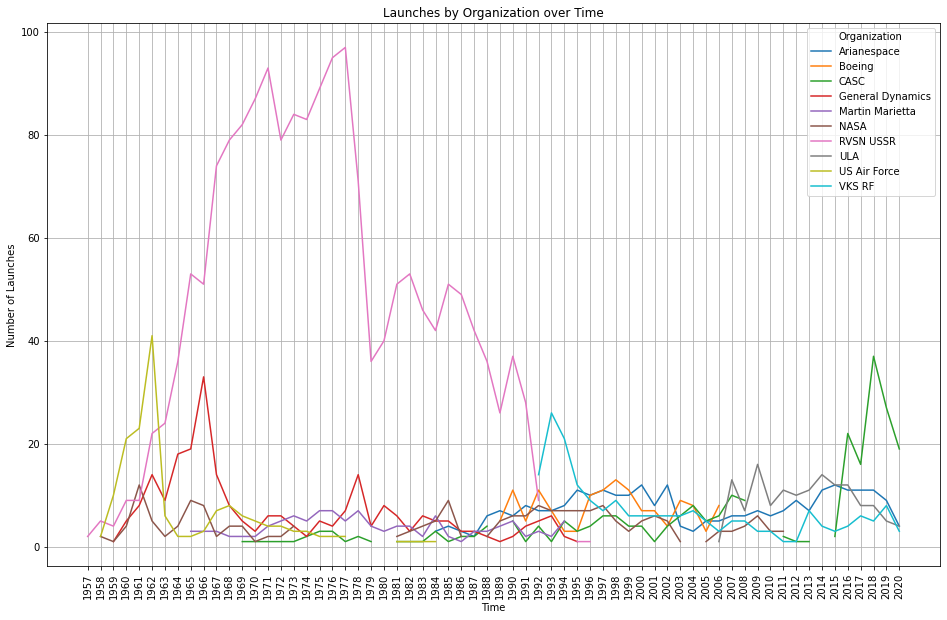

In [ ]:
pivoted.plot(title="Launches by Organization over Time", figsize=(16,10), grid=True,
             xlabel="Time",
             ylabel="Number of Launches",
             xticks=pivoted.index,
             rot=90,
             )

In [ ]:
organization_data.sample()

Organization  Year  Launches
111  General Dynamics  1968         8

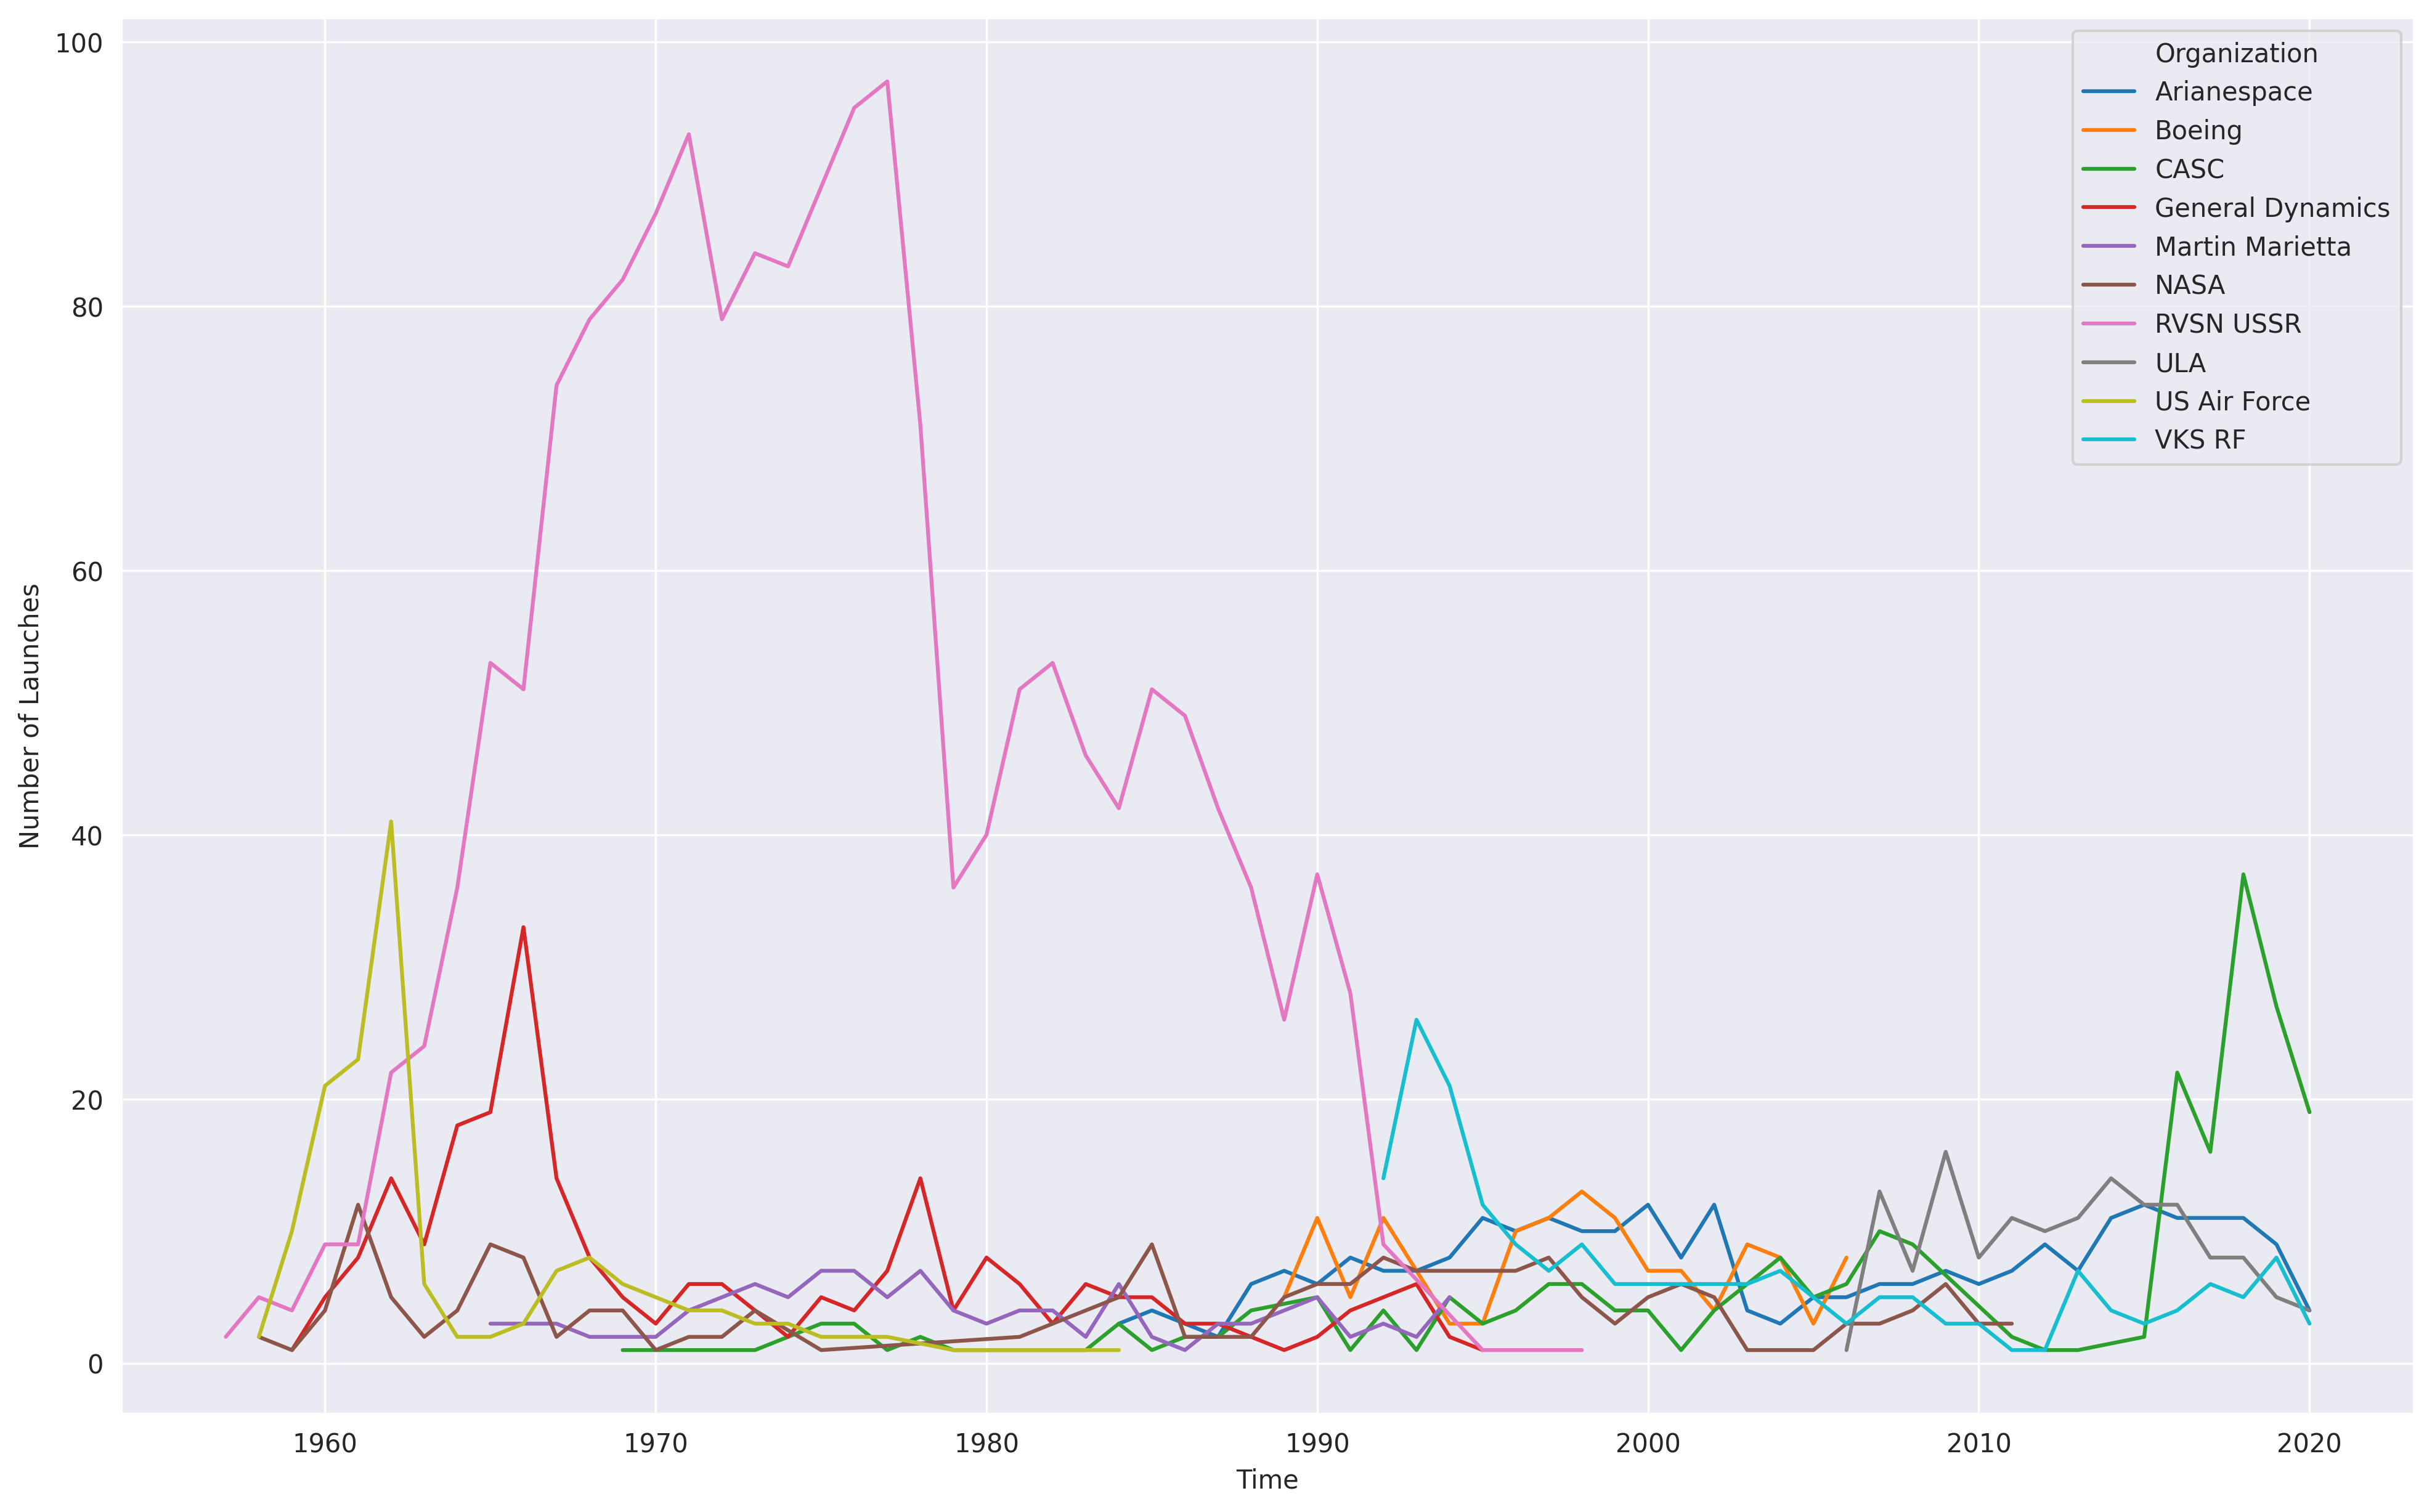

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
with sns.axes_style("darkgrid"):
  axes = sns.lineplot(data=organization_data, x='Year', y='Launches', hue='Organization')
  axes.set(
      ylabel="Number of Launches",
      xlabel="Time",
  )
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
df_data.head(2)

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   

  Rocket_Status  Price Mission_Status Country Country_code  Year  Date_time  
0  StatusActive  50.00        Success     USA          USA  2020 2020-08-07  
1  StatusActive  29.75        Success   China          CHN  2020 2020-08-06

In [ ]:
cold_war = df_data[df_data.Date_time.dt.year < 1992]

In [ ]:
cold_war.head(2)

Organisation                                      Location  \
1717         CASC  LC-3, Xichang Satellite Launch Center, China   
1718    RVSN USSR  Site 175/58, Baikonur Cosmodrome, Kazakhstan   

                            Date                          Detail  \
1717  Sat Dec 28, 1991 12:00 UTC        Long March 3 | DFH-2A-T5   
1718            Fri Dec 20, 1991  Rokot/Briz K | GVM Demo Flight   

      Rocket_Status  Price   Mission_Status     Country Country_code  Year  \
1717  StatusRetired    NaN  Partial Failure       China          CHN  1991   
1718  StatusRetired    NaN          Success  Kazakhstan          KAZ  1991   

      Date_time  
1717 1991-12-28  
1718 1991-12-20

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
USSR = ["Russian Federation", "Kazakhstan"]
launches_by_USSR = df_data[df_data["Country"].isin(USSR)]

In [ ]:
launches_by_USSR.shape[0]

2099

In [ ]:
launches_by_USA = df_data[df_data["Country"] == "USA"]

In [ ]:
launches_by_USA.shape[0]

1351

In [ ]:
data = [["USSR", 2099], ["USA", 1351]]
USSR_vs_USA = pd.DataFrame(data, columns=["Country", "Launches"])
USSR_vs_USA

Country  Launches
0    USSR      2099
1     USA      1351

In [ ]:
fig = px.pie(USSR_vs_USA, values='Launches', names='Country', title='Total Number of Launches of the USSR and the USA')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
USSR_yearly = launches_by_USSR.groupby(launches_by_USSR.Date_time.dt.year).Detail.agg(["count"]).rename_axis(["Year"]).reset_index()

In [ ]:
USSR_yearly.head()

Year  count
0  1957      2
1  1958      5
2  1959      4
3  1960      9
4  1961      9

In [ ]:
USA_yearly = launches_by_USA.groupby(launches_by_USA.Date_time.dt.year).Detail.agg(["count"]).rename_axis(["Year"]).reset_index()

In [ ]:
USA_yearly.head()

Year  count
0  1957      1
1  1958     23
2  1959     16
3  1960     30
4  1961     43

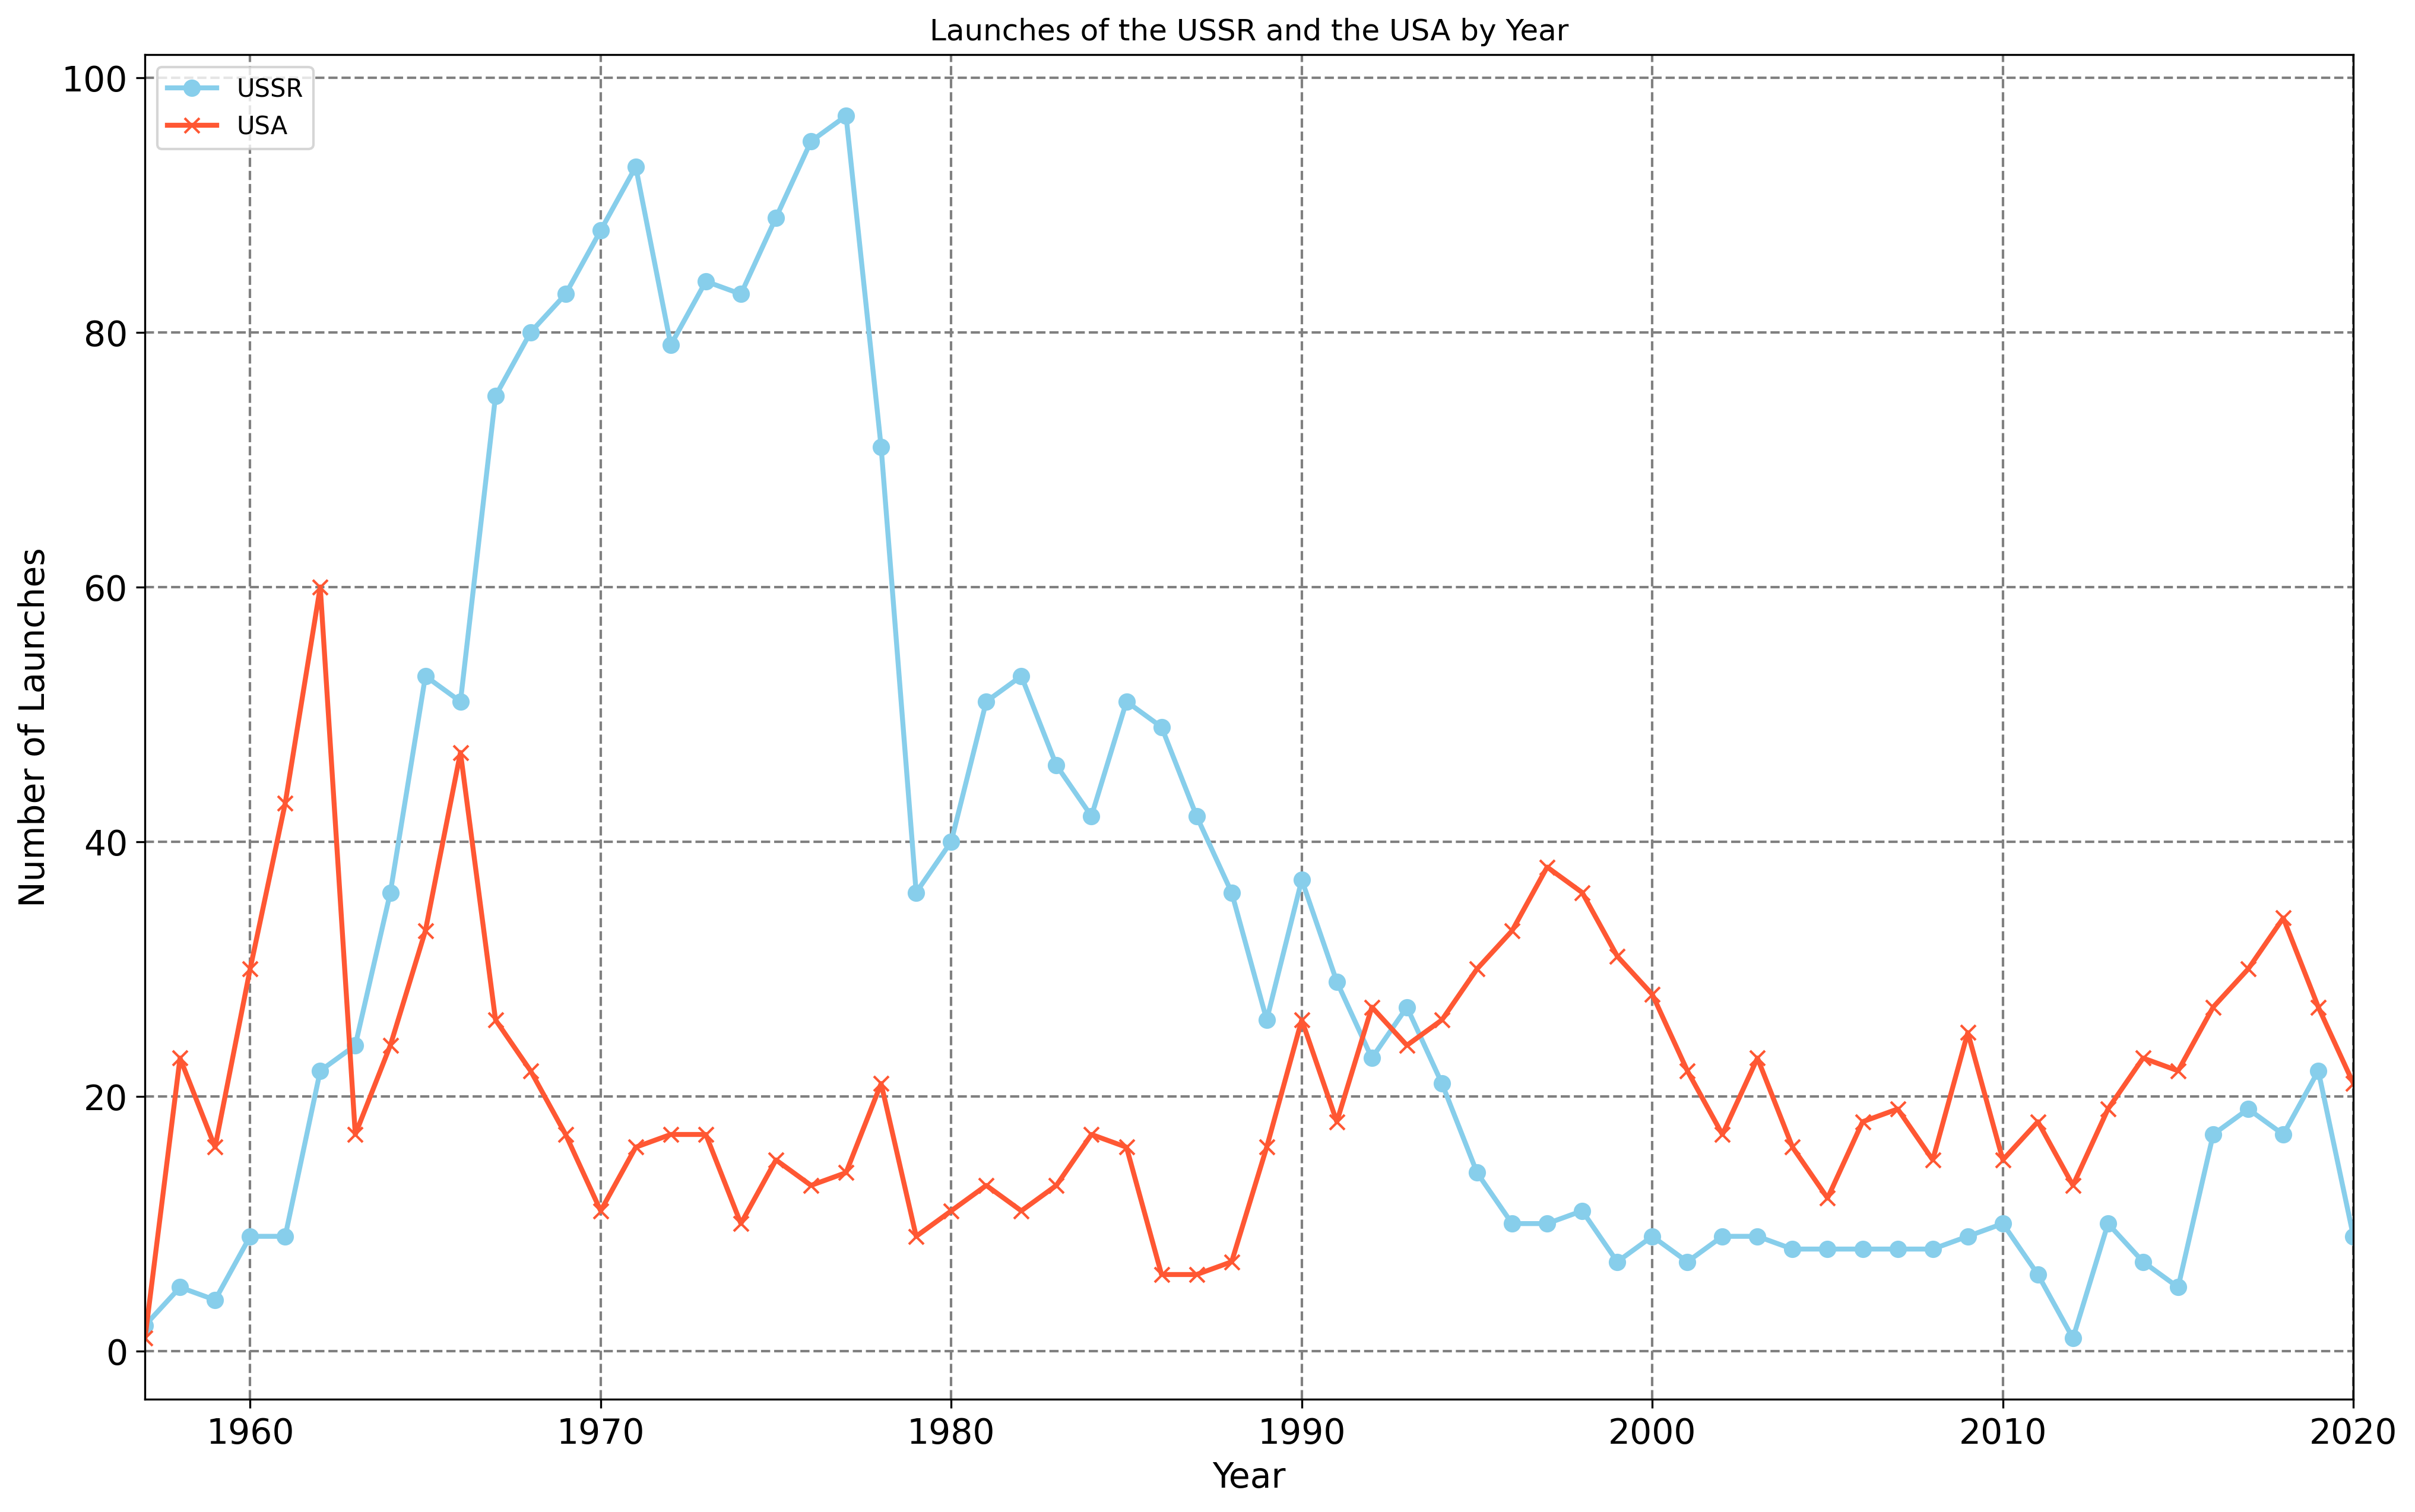

In [ ]:
plt.figure(figsize=(16,10), dpi=300) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=0)
plt.title("Launches of the USSR and the USA by Year")

plt.plot(USSR_yearly["Year"], USSR_yearly["count"], linewidth=2, color="skyblue", marker="o", label="USSR")
plt.plot(USA_yearly["Year"], USA_yearly["count"], linewidth=2, color="#FF5733", marker="x", label="USA")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
plt.xlim(USA_yearly.Year.min(), USA_yearly.Year.max())
plt.legend(loc="upper left")

# Create locators for ticks on the time axis
# years = mdates.YearLocator()
# months = mdates.MonthLocator()
# years_fmt = mdates.DateFormatter("%Y")

# axis = plt.gca()
# axis.xaxis.set_major_locator(years)
# axis.xaxis.set_major_formatter(years_fmt)
# axis.xaxis.set_minor_locator(months)

plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
launches_by_USSR.sample()

Organisation                                 Location  \
1771    RVSN USSR  Site 133/3, Plesetsk Cosmodrome, Russia   

                            Date                            Detail  \
1771  Tue Feb 05, 1991 02:36 UTC  Cosmos-3M (11K65M) | Cosmos 2123   

      Rocket_Status  Price Mission_Status             Country Country_code  \
1771  StatusRetired    NaN        Success  Russian Federation          RUS   

      Year  Date_time  
1771  1991 1991-02-05

In [ ]:
USSR_failures = launches_by_USSR[launches_by_USSR.Mission_Status != "Success"].groupby(launches_by_USSR.Date_time.dt.year).Detail.agg(["count"]).rename_axis(["Year"]).reset_index()

In [ ]:
USSR_failures.sample()

Year  count
28  1987      1

In [ ]:
USSR_failures.shape[0]

48

In [ ]:
USA_failures = launches_by_USA[launches_by_USA.Mission_Status != "Success"].groupby(launches_by_USA.Date_time.dt.year).Detail.agg(["count"]).rename_axis(["Year"]).reset_index()

In [ ]:
USA_failures.head()

Year  count
0  1957      1
1  1958     18
2  1959     10
3  1960     14
4  1961     16

In [ ]:
USA_failures.shape[0]

52

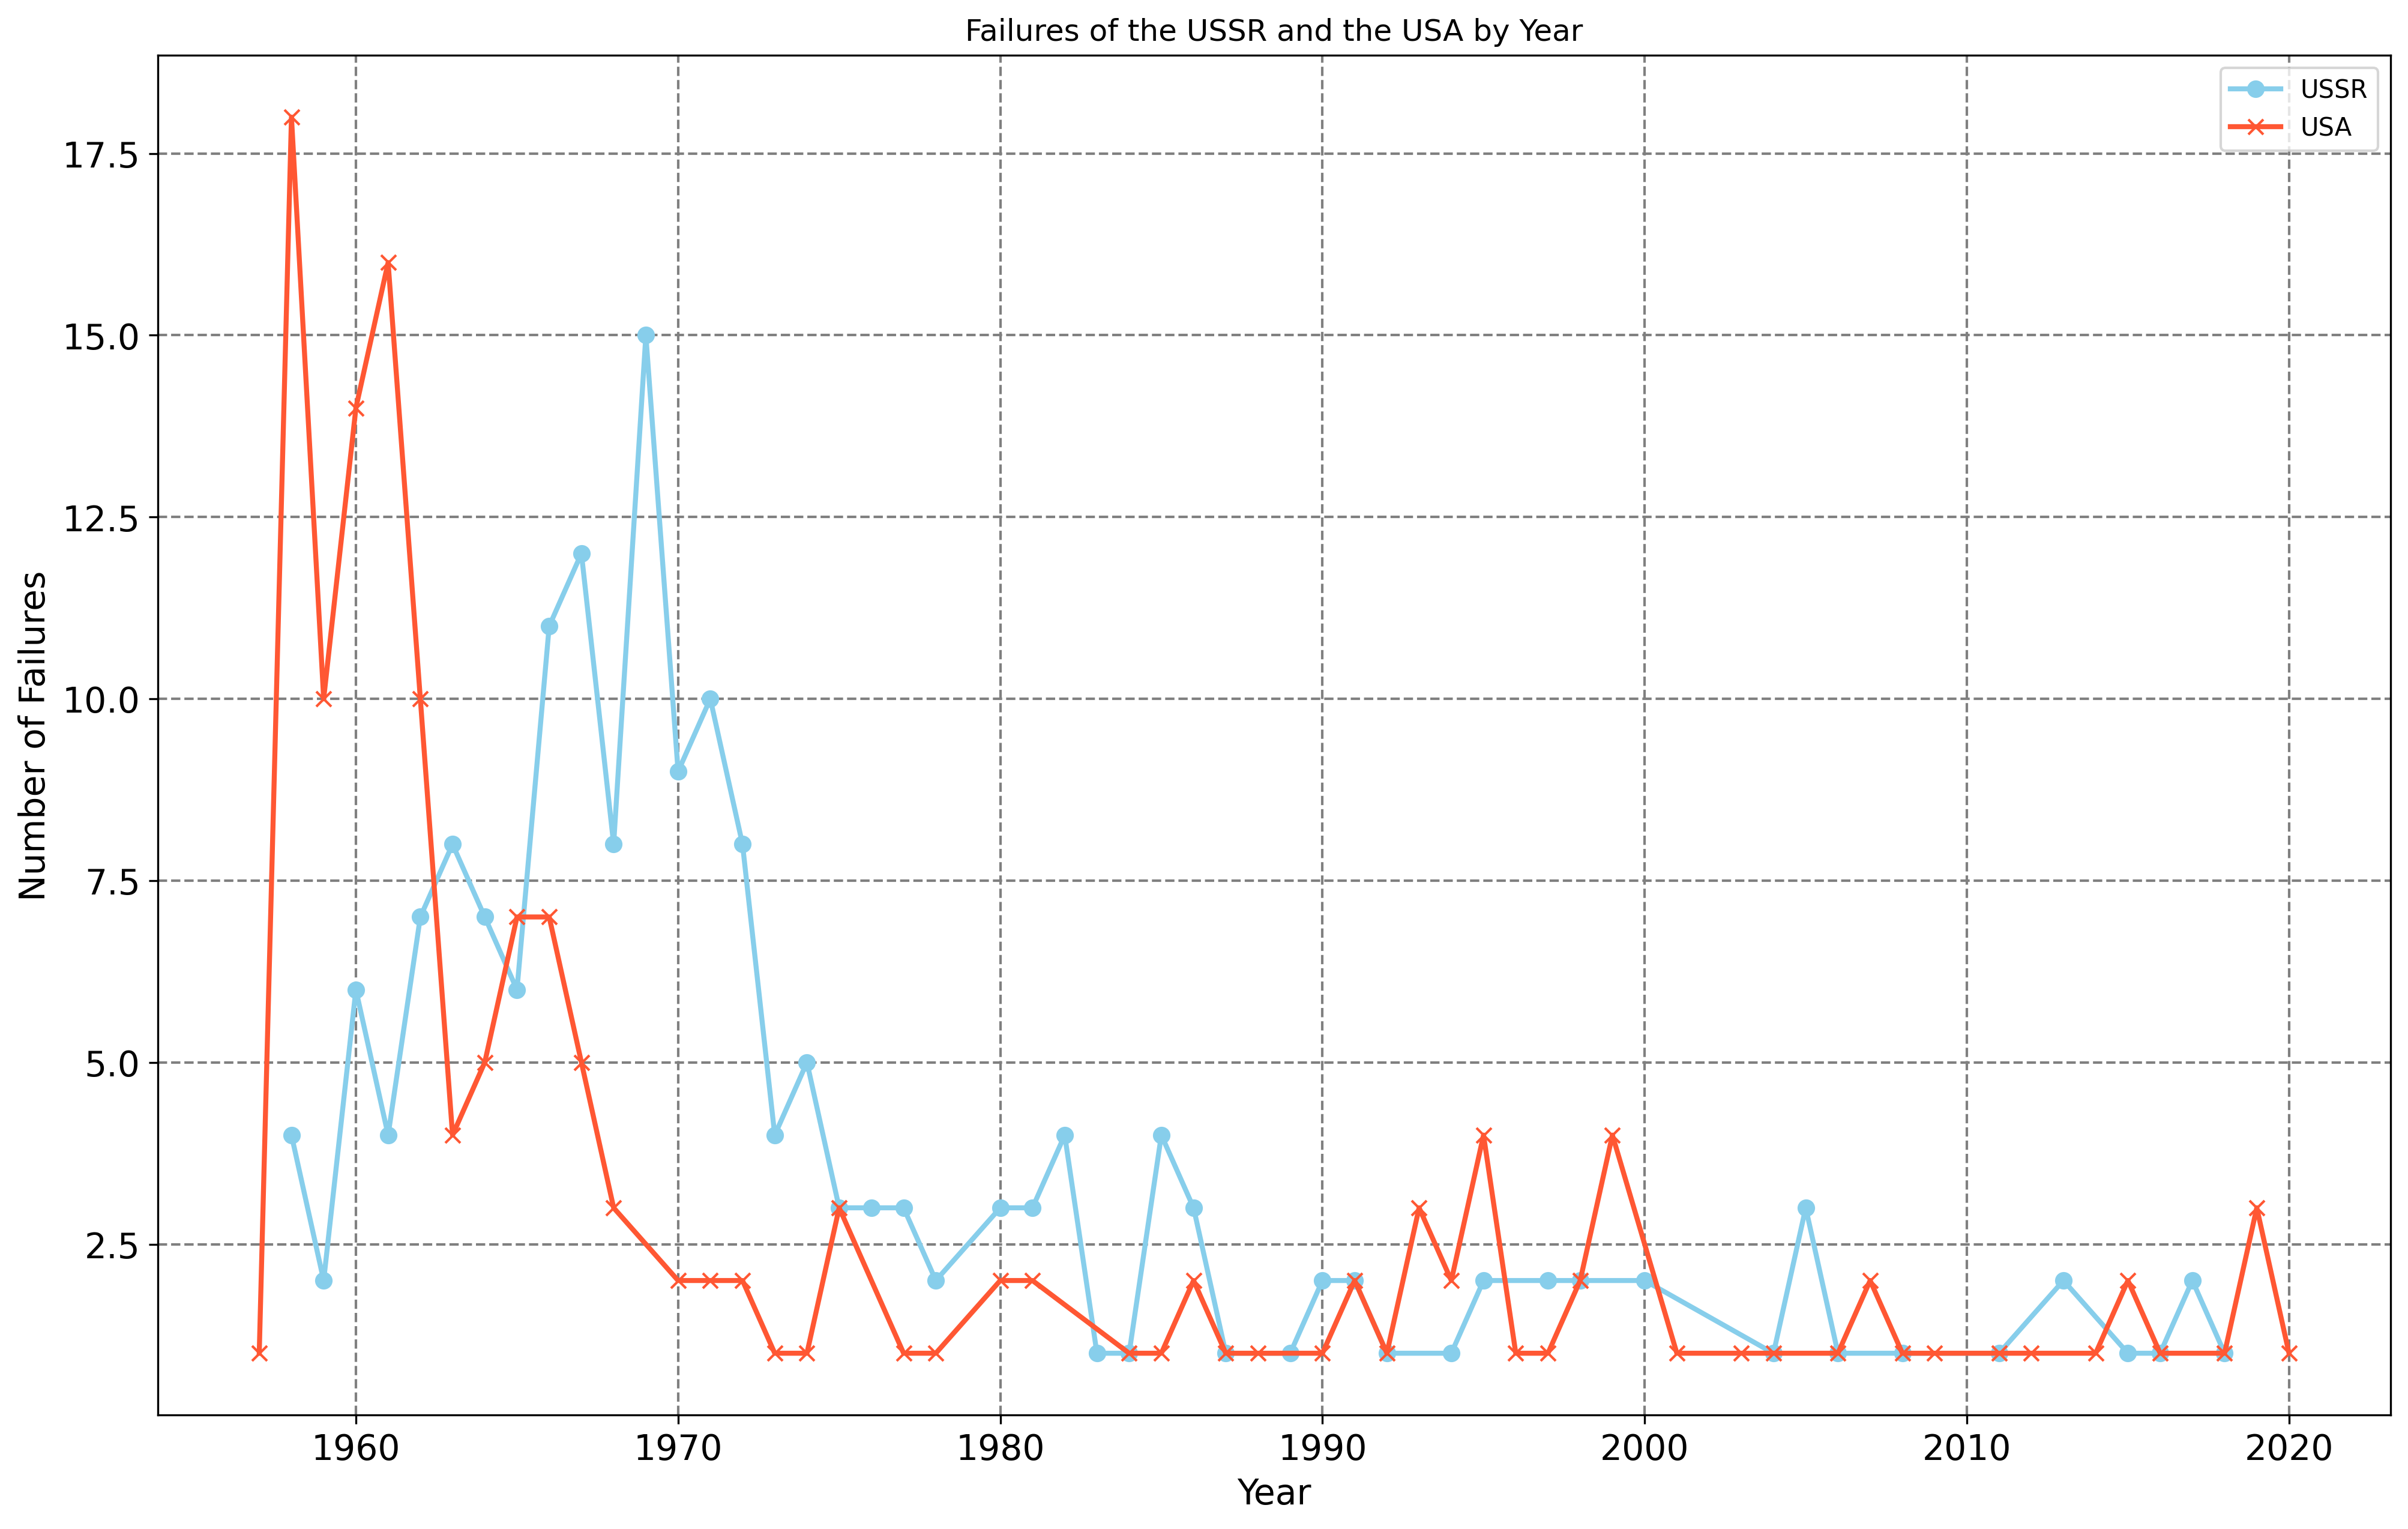

In [ ]:
plt.figure(figsize=(16,10), dpi=300) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=0)
plt.title("Failures of the USSR and the USA by Year")

plt.plot(USSR_failures["Year"], USSR_failures["count"], linewidth=2, color="skyblue", marker="o", label="USSR")
plt.plot(USA_failures["Year"], USA_failures["count"], linewidth=2, color="#FF5733", marker="x", label="USA")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Failures", fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
# plt.xlim(USA_yearly.Year.min(), USA_yearly.Year.max())
plt.legend(loc="upper right")

plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
launches_by_USSR.sample()

Organisation                                     Location  \
2356    RVSN USSR  Site 90/19, Baikonur Cosmodrome, Kazakhstan   

                            Date                   Detail  Rocket_Status  \
2356  Thu Feb 11, 1982 01:11 UTC  Tsyklon-2 | Cosmos 1337  StatusRetired   

      Price Mission_Status     Country Country_code  Year  Date_time  
2356    NaN        Success  Kazakhstan          KAZ  1982 1982-02-11

In [ ]:
USSR_status = launches_by_USSR.groupby([launches_by_USSR.Date_time.dt.year, "Mission_Status"]).Detail.agg(["count"]).unstack(fill_value=0).stack().rename_axis(["Year", "Status"]).reset_index()

In [ ]:
USSR_status.head()

Year             Status  count
0  1957            Failure      0
1  1957    Partial Failure      0
2  1957  Prelaunch Failure      0
3  1957            Success      2
4  1958            Failure      4

In [ ]:
failures_of_USSR = USSR_status[USSR_status["Status"] != "Success"].groupby(["Year"])["count"].agg(["sum"]).rename_axis(["Year"]).reset_index()
print(failures_of_USSR.shape[0])
failures_of_USSR.head()

64


Year  sum
0  1957    0
1  1958    4
2  1959    2
3  1960    6
4  1961    4

In [ ]:
USSR_yearly.shape[0]

64

In [ ]:
failures_of_USSR["Percentage"] = failures_of_USSR["sum"] / USSR_yearly["count"] * 100

In [ ]:
failures_of_USSR.head()

Year  sum  Percentage
0  1957    0        0.00
1  1958    4       80.00
2  1959    2       50.00
3  1960    6       66.67
4  1961    4       44.44

In [ ]:
USSR_yearly.head()

Year  count
0  1957      2
1  1958      5
2  1959      4
3  1960      9
4  1961      9

In [ ]:
USA_yearly.head()

Year  count
0  1957      1
1  1958     23
2  1959     16
3  1960     30
4  1961     43

In [ ]:
USA_status = launches_by_USA.groupby([launches_by_USA.Date_time.dt.year, "Mission_Status"]).Detail.agg(["count"]).unstack(fill_value=0).stack().rename_axis(["Year", "Status"]).reset_index()
failures_of_USA = USA_status[USA_status["Status"] != "Success"].groupby(["Year"])["count"].agg(["sum"]).rename_axis(["Year"]).reset_index()
failures_of_USA["Percentage"] = failures_of_USA["sum"] / USA_yearly["count"] * 100

In [ ]:
print(failures_of_USA.shape[0], USA_yearly.shape[0])

64 64


In [ ]:
failures_of_USA.head()

Year  sum  Percentage
0  1957    1      100.00
1  1958   18       78.26
2  1959   10       62.50
3  1960   14       46.67
4  1961   16       37.21

In [ ]:
failures_of_USA.shape[0]

64

In [ ]:
failures_of_USA[failures_of_USA["Percentage"] > 100].values.any()

False

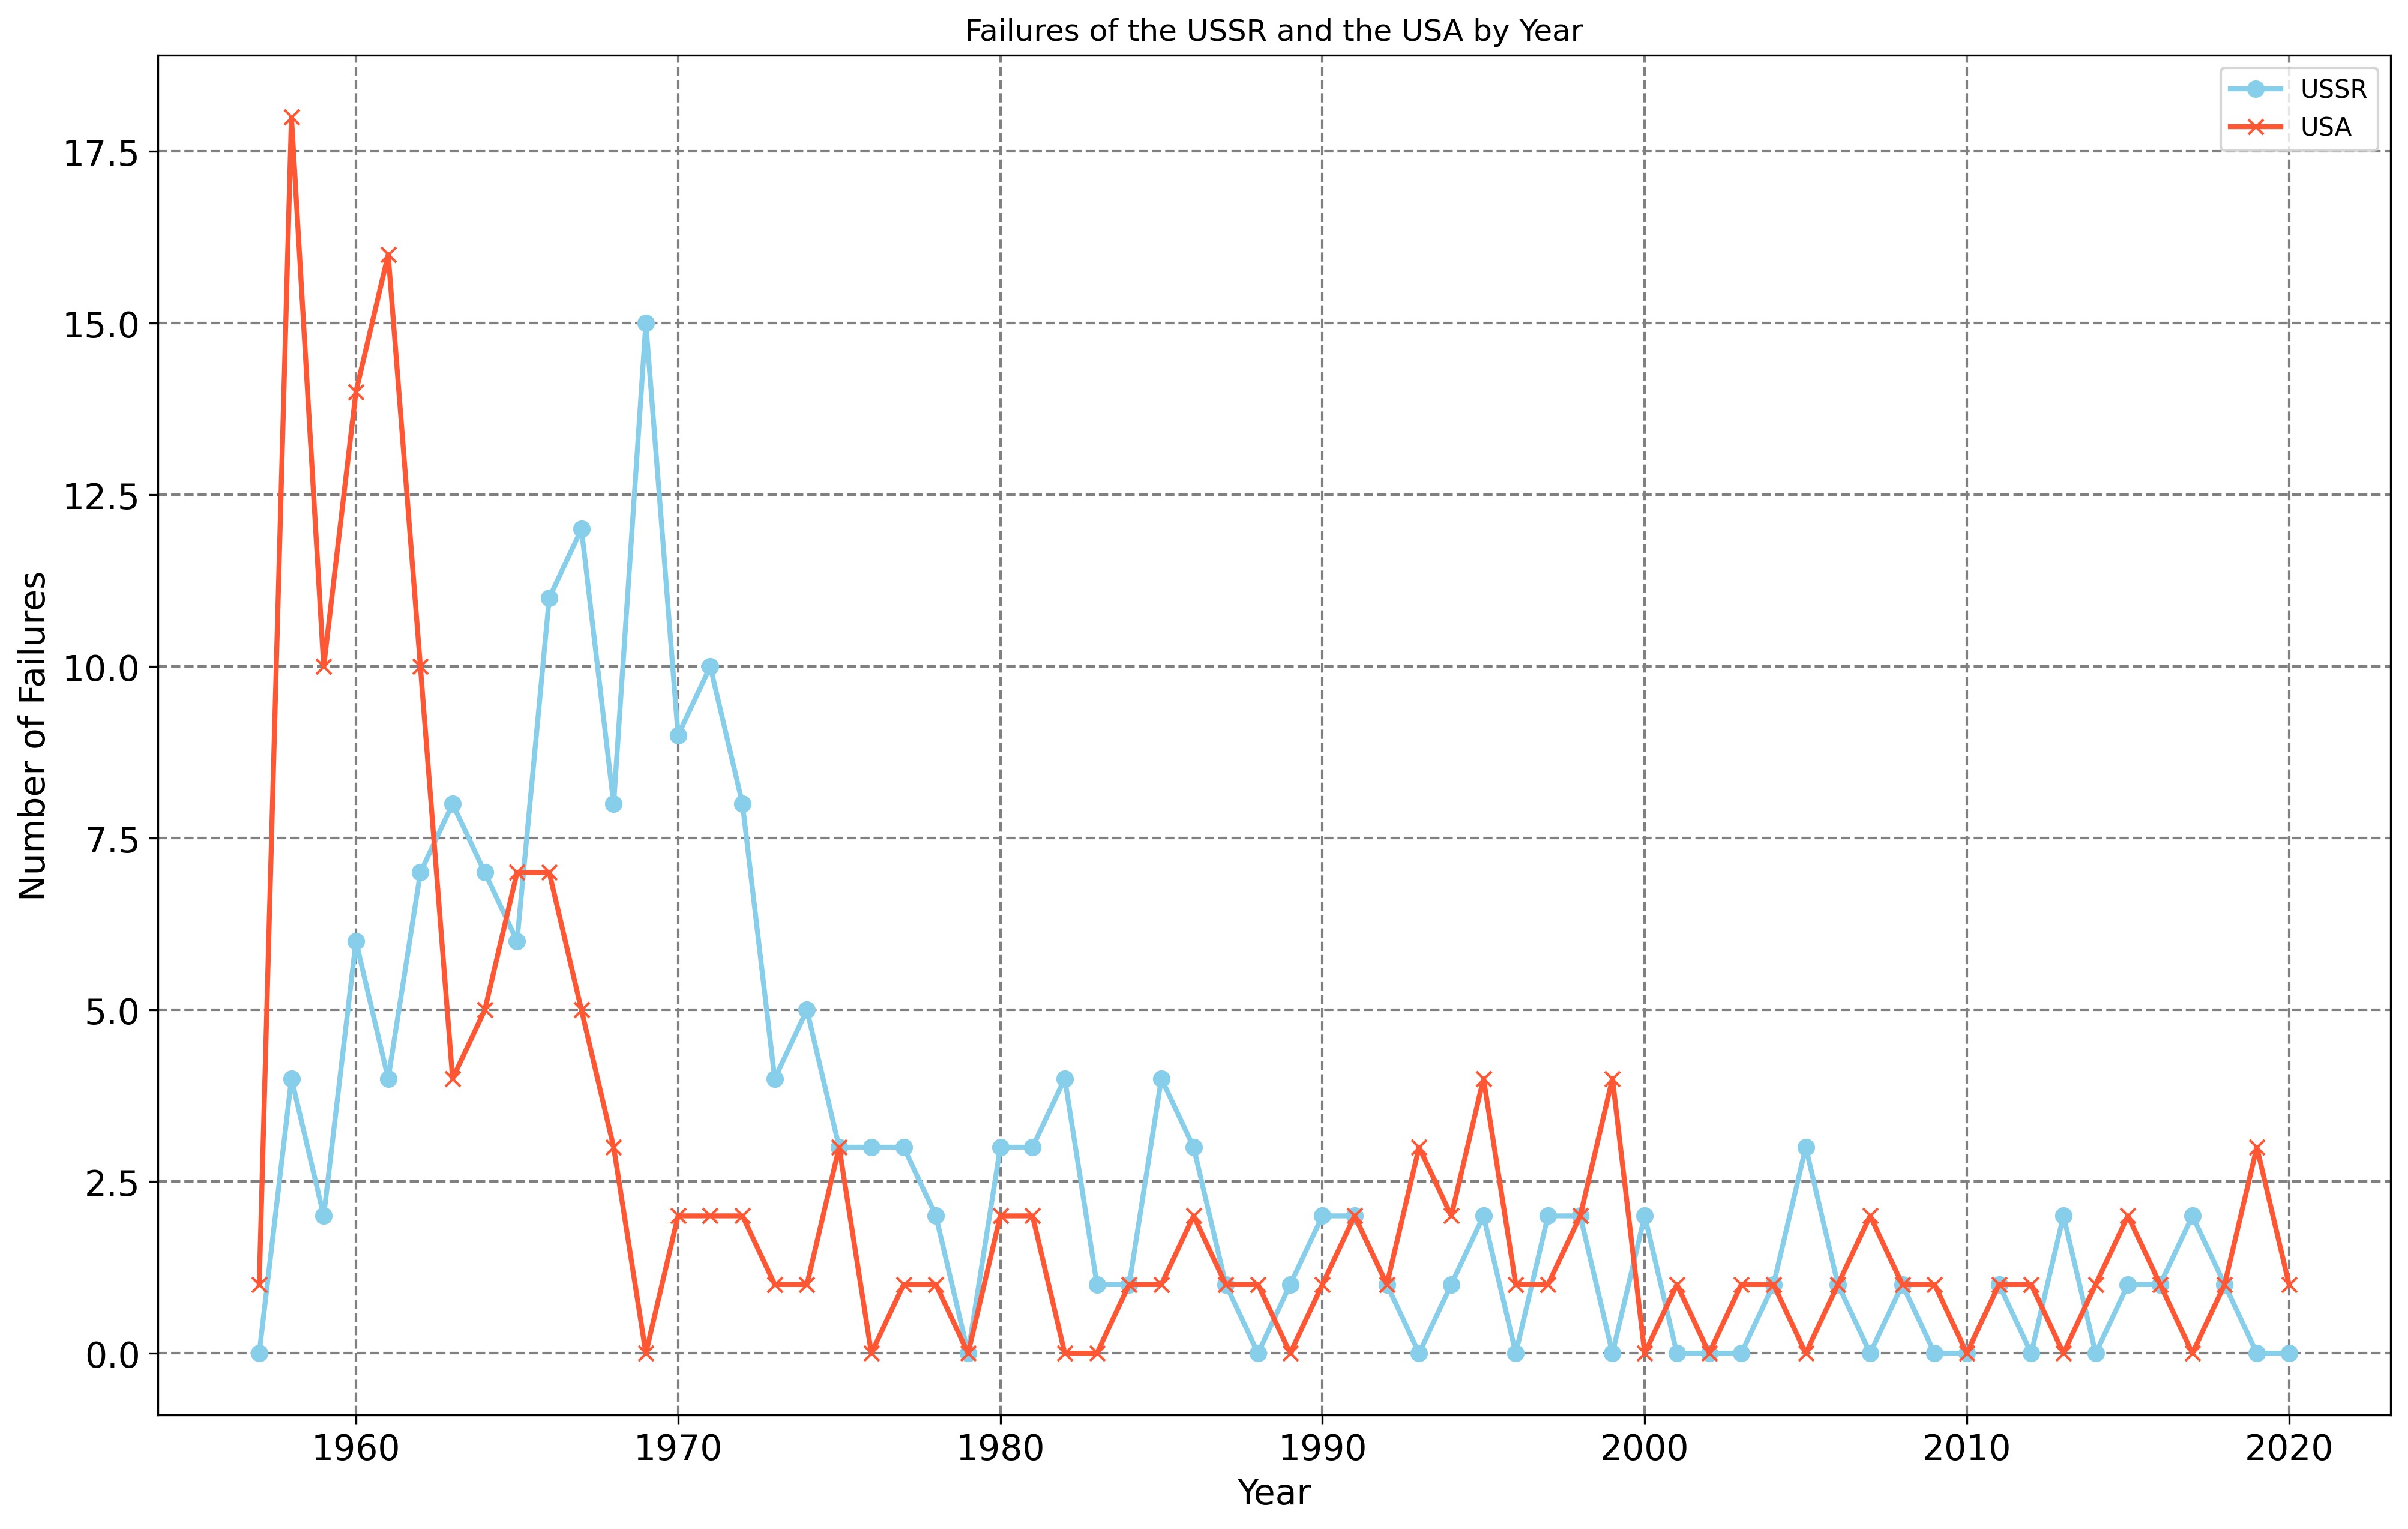

In [ ]:
plt.figure(figsize=(16,10), dpi=300) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=0)
plt.title("Failures of the USSR and the USA by Year")

plt.plot(failures_of_USSR["Year"], failures_of_USSR["sum"], linewidth=2, color="skyblue", marker="o", label="USSR")
plt.plot(failures_of_USA["Year"], failures_of_USA["sum"], linewidth=2, color="#FF5733", marker="x", label="USA")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Failures", fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
plt.legend(loc="upper right")

plt.show()

In [ ]:
df_data.groupby(df_data["Date_time"].dt.year).Detail.agg("count")

Date_time
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Detail, Length: 64, dtype: int64

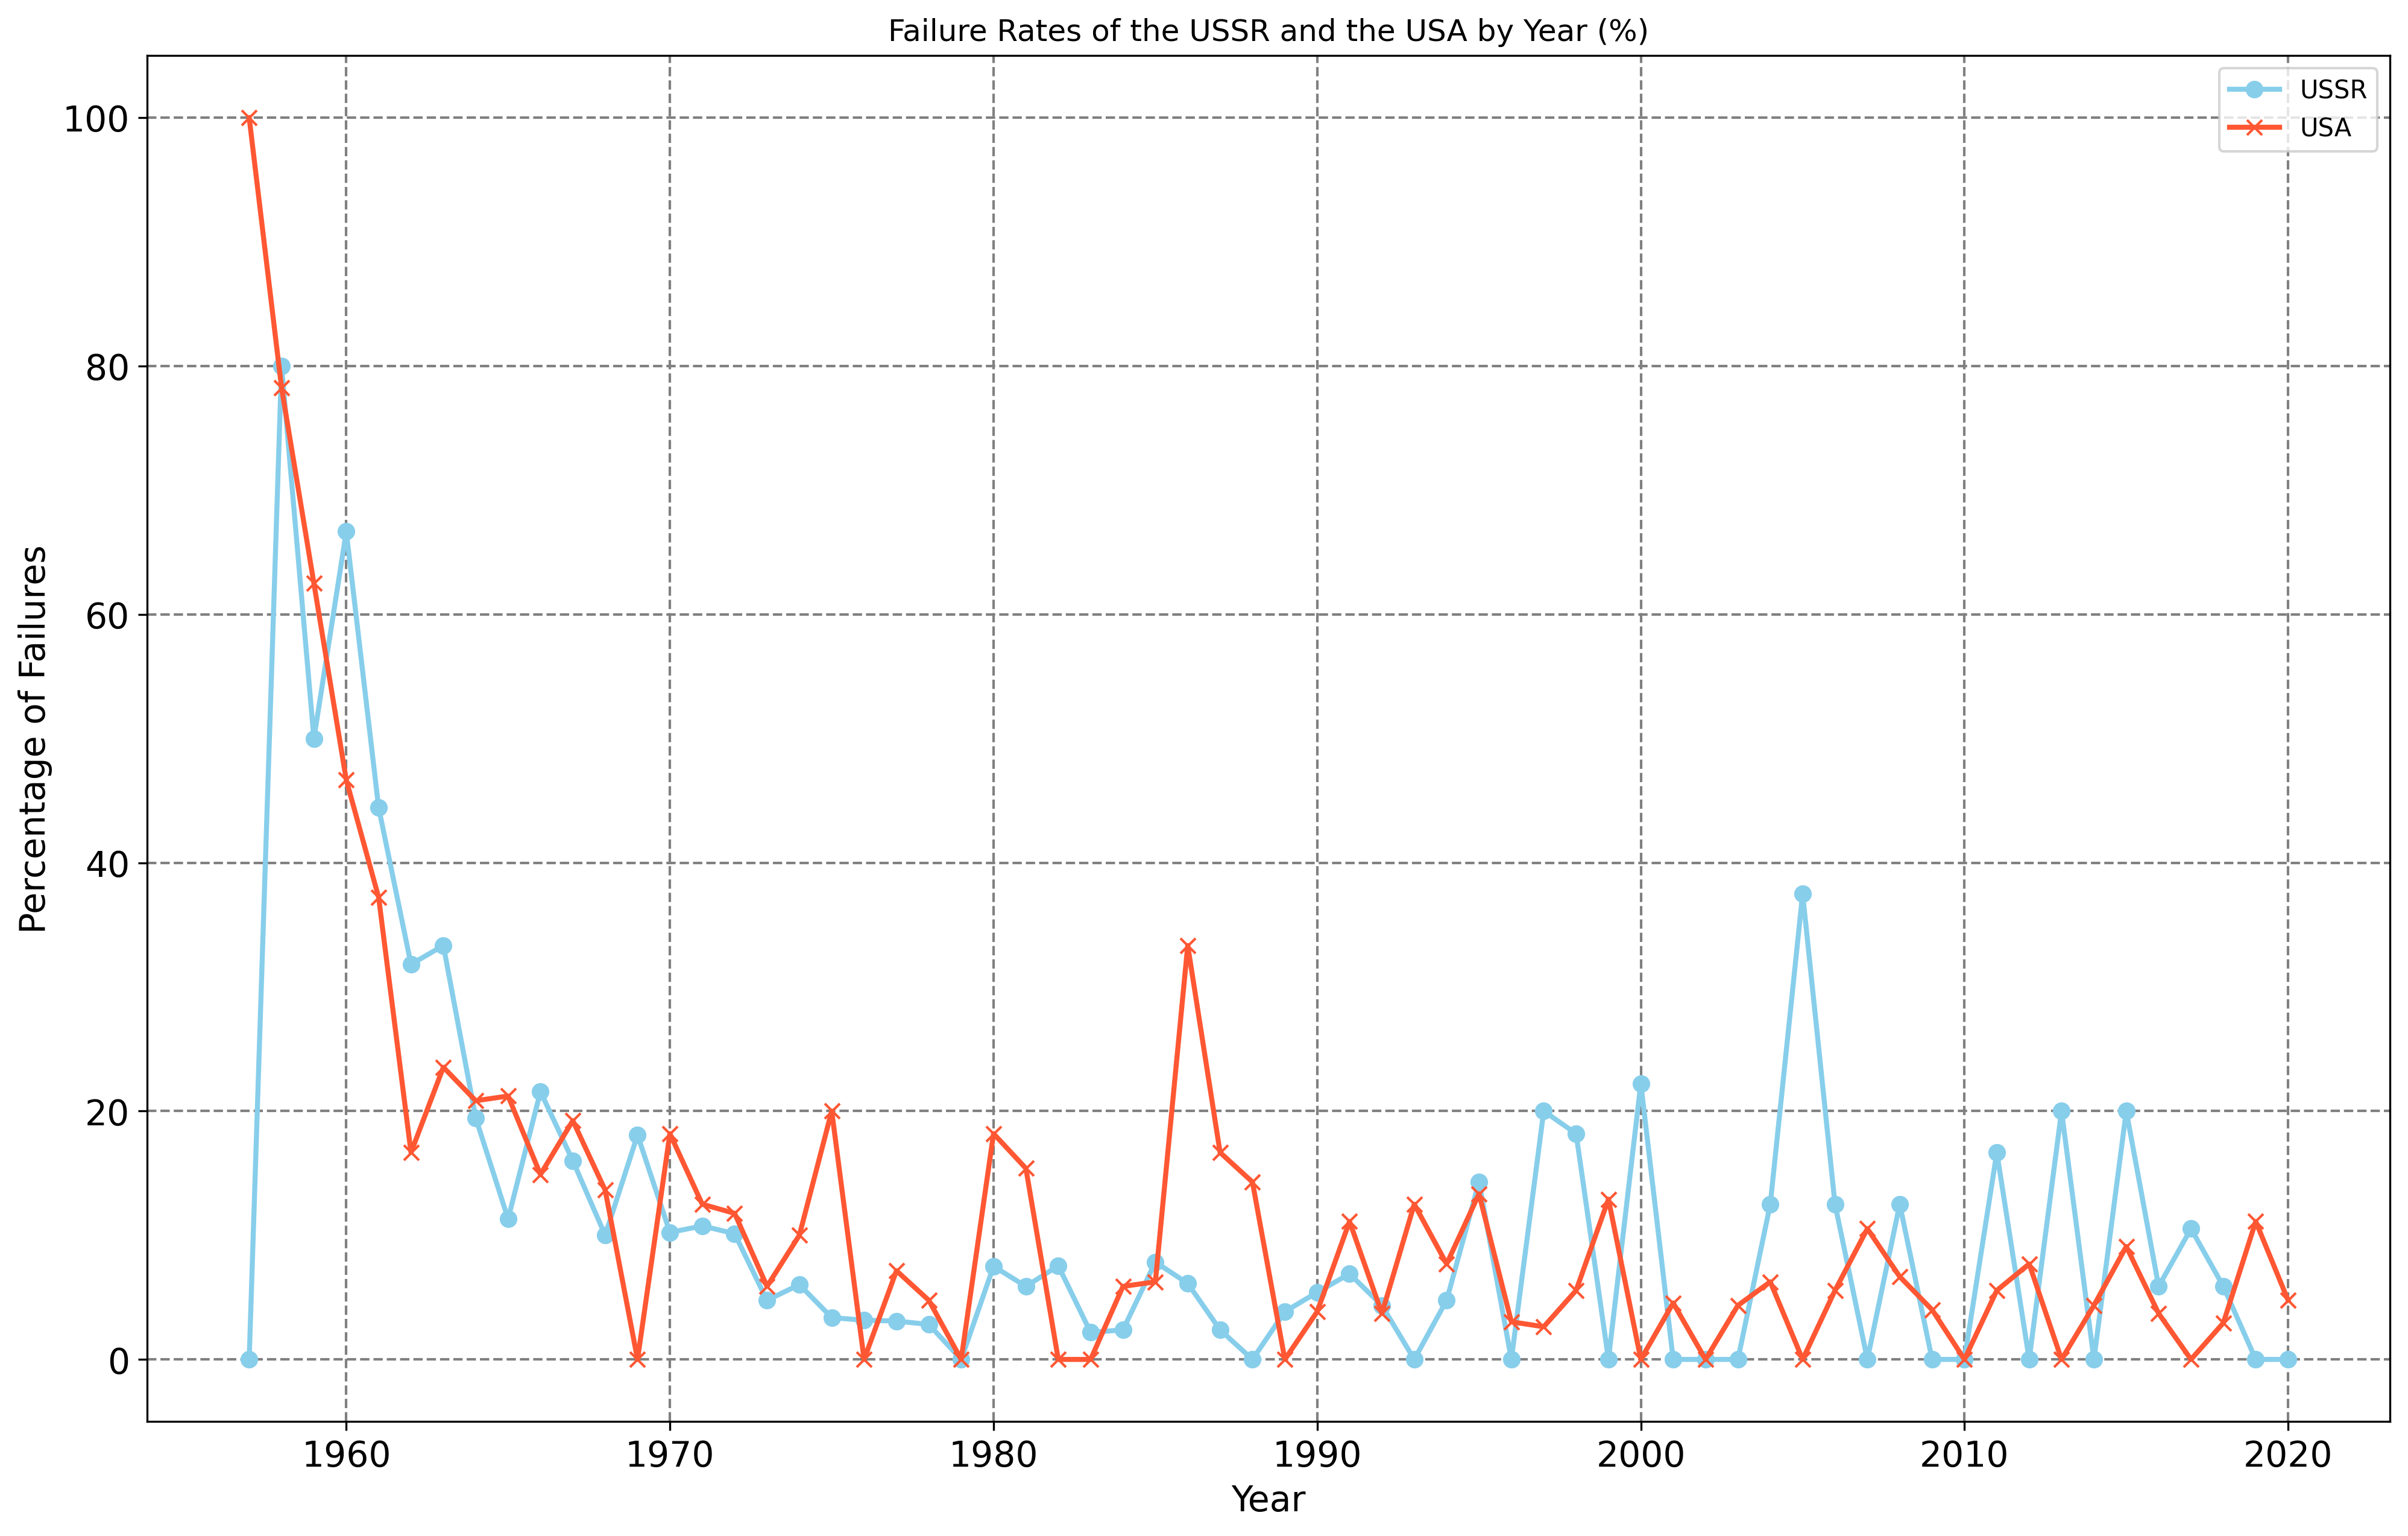

In [ ]:
plt.figure(figsize=(16,10), dpi=300) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=0)
plt.title("Failure Rates of the USSR and the USA by Year (%)")

plt.plot(failures_of_USSR["Year"], failures_of_USSR["Percentage"], linewidth=2, color="skyblue", marker="o", label="USSR")
plt.plot(failures_of_USA["Year"], failures_of_USA["Percentage"], linewidth=2, color="#FF5733", marker="x", label="USA")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage of Failures", fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
plt.legend(loc="upper right")

plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
USSR_yearly.shape[0]

64

In [ ]:
USA_yearly.shape[0]

64

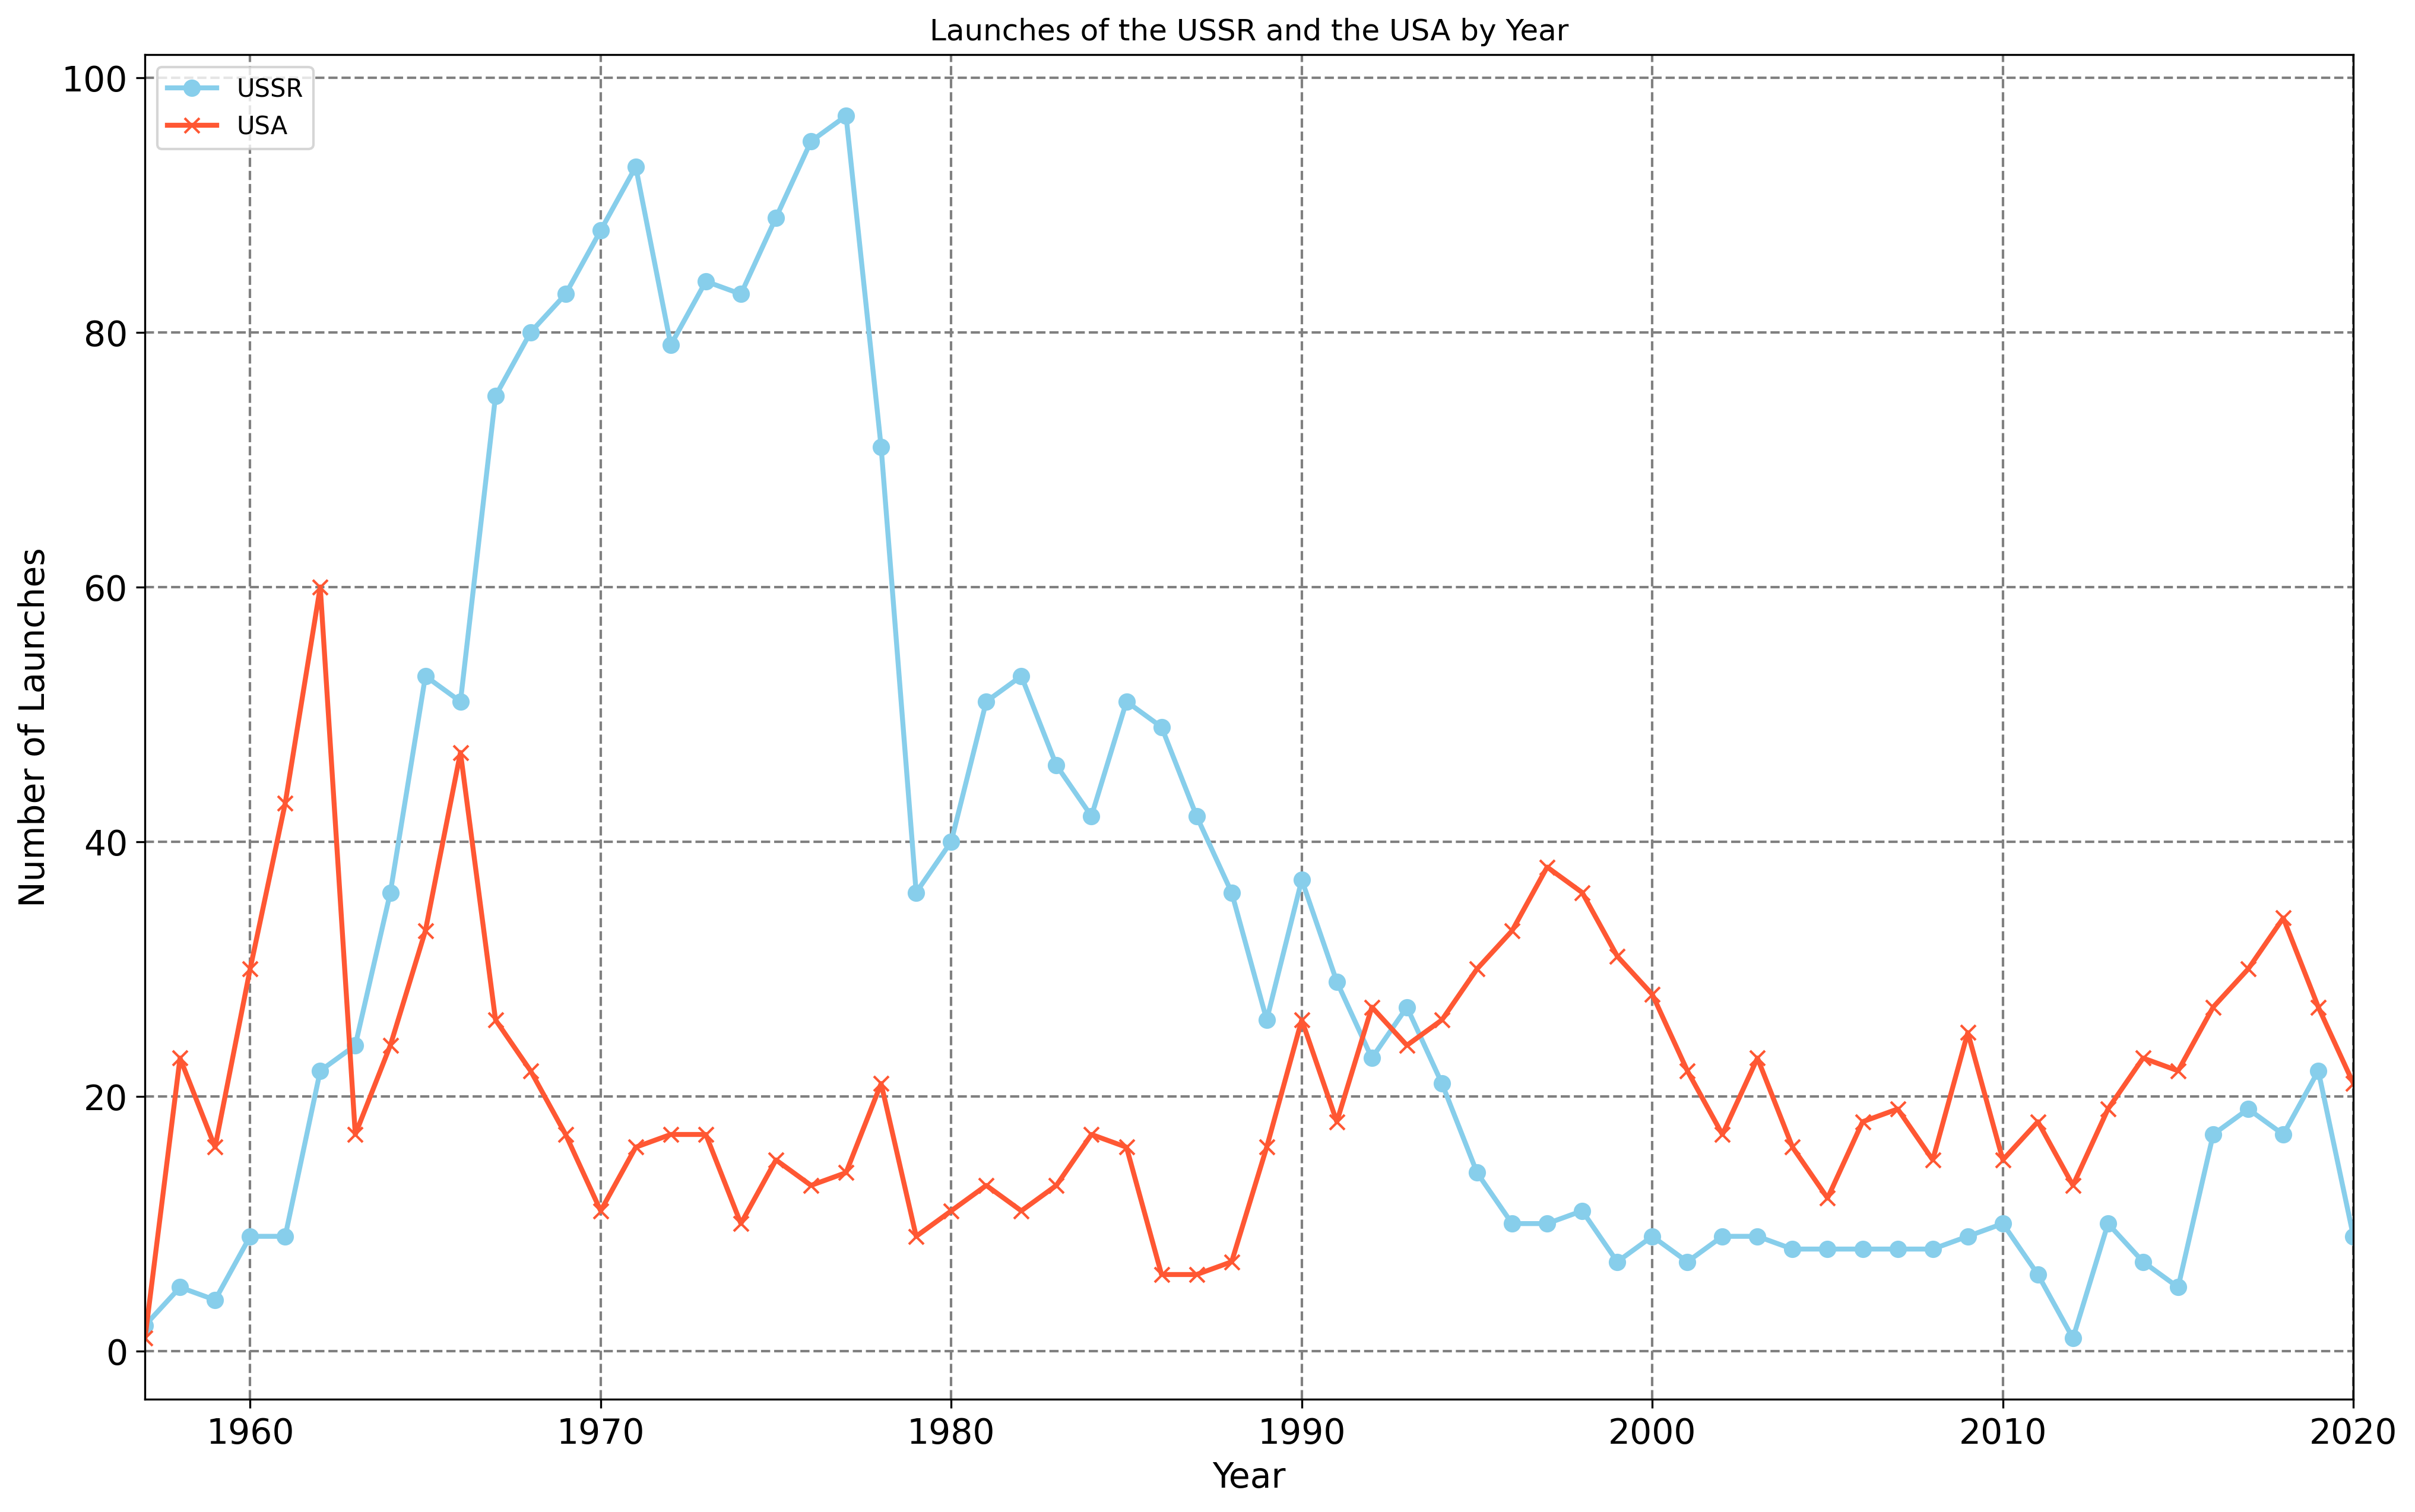

In [ ]:
plt.figure(figsize=(16,10), dpi=300) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=0)
plt.title("Launches of the USSR and the USA by Year")

plt.plot(USSR_yearly["Year"], USSR_yearly["count"], linewidth=2, color="skyblue", marker="o", label="USSR")
plt.plot(USA_yearly["Year"], USA_yearly["count"], linewidth=2, color="#FF5733", marker="x", label="USA")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
plt.xlim(USA_yearly.Year.min(), USA_yearly.Year.max())
plt.legend(loc="upper left")

plt.show()

In [ ]:
USA_yearly.sample()

Year  count
50  2007     19

In [ ]:
USA_yearly["dominant"] = np.where(USA_yearly["count"] > USSR_yearly["count"], "USA", "USSR")
USSR_yearly["dominant"] = np.where(USA_yearly["count"] > USSR_yearly["count"], "USA", "USSR")

In [ ]:
USA_yearly.head(2)

Year  count dominant
0  1957      1     USSR
1  1958     23      USA

In [ ]:
USSR_yearly.head(2)

Year  count dominant
0  1957      2     USSR
1  1958      5      USA

In [ ]:
# USA_status = launches_by_USA.groupby([launches_by_USA.Date_time.dt.year, "Mission_Status"]).Detail.agg(["count"]).unstack(fill_value=0).stack().rename_axis(["Year", "Status"]).reset_index()
successes_of_USA = USA_status[USA_status["Status"] == "Success"].groupby(["Year"])["count"].agg(["sum"]).rename_axis(["Year"]).reset_index()

successes_of_USSR = USSR_status[USSR_status["Status"] == "Success"].groupby(["Year"])["count"].agg(["sum"]).rename_axis(["Year"]).reset_index()

In [ ]:
print(successes_of_USA.shape[0], successes_of_USSR.shape[0])

64 64


In [ ]:
successes_of_USA.head()

Year  sum
0  1957    0
1  1958    5
2  1959    6
3  1960   16
4  1961   27

In [ ]:
successes_of_USSR.head()

Year  sum
0  1957    2
1  1958    1
2  1959    2
3  1960    3
4  1961    5

In [ ]:
successes_of_USA[successes_of_USA["sum"] == 0].values.any()

True

In [ ]:
successes_of_USSR[successes_of_USSR["sum"] == 0].values.any()

False

In [ ]:
successes_of_USA["dominant"] = np.where(successes_of_USA["sum"] > successes_of_USSR["sum"], "USA", "USSR")
successes_of_USSR["dominant"] = np.where(successes_of_USA["sum"] > successes_of_USSR["sum"], "USA", "USSR")

In [ ]:
successes_of_USA.head(2)

Year  sum dominant
0  1957    0     USSR
1  1958    5      USA

In [ ]:
successes_of_USSR.head(2)

Year  sum dominant
0  1957    2     USSR
1  1958    1      USA

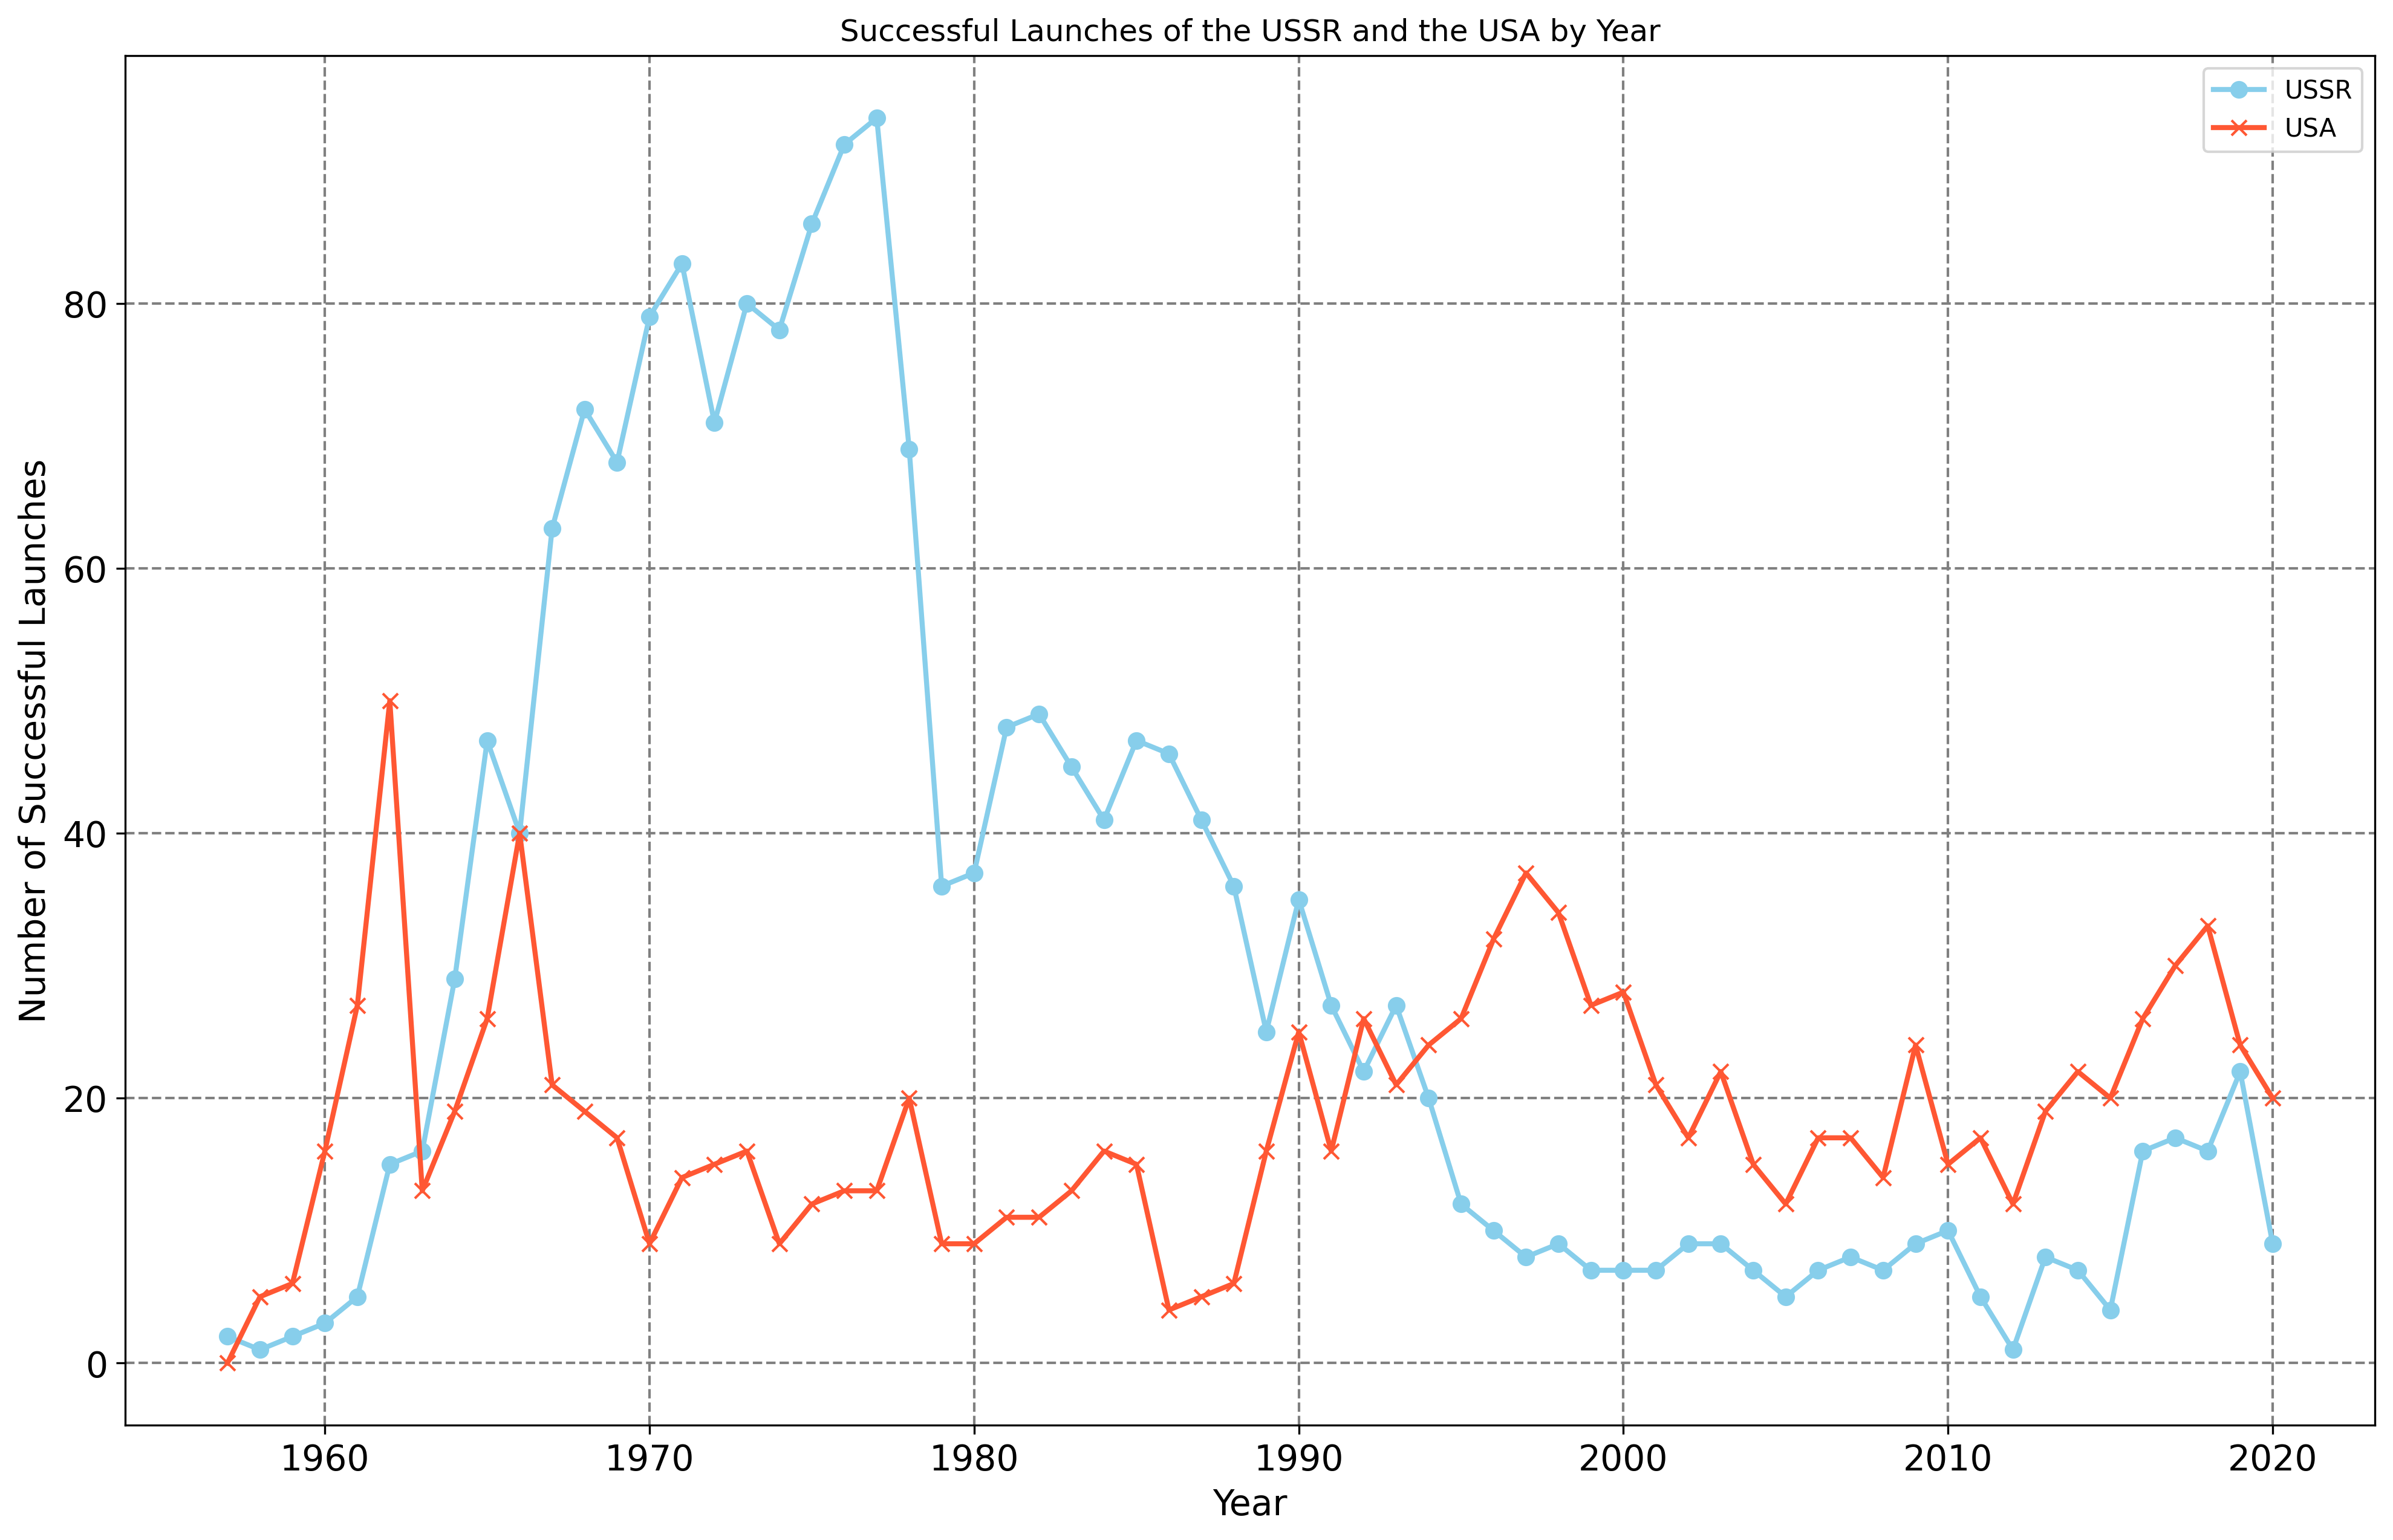

In [ ]:
plt.figure(figsize=(16,10), dpi=300) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=0)
plt.title("Successful Launches of the USSR and the USA by Year")

plt.plot(successes_of_USSR["Year"], successes_of_USSR["sum"], linewidth=2, color="skyblue", marker="o", label="USSR")
plt.plot(successes_of_USA["Year"], successes_of_USA["sum"], linewidth=2, color="#FF5733", marker="x", label="USA")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Successful Launches", fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=1, axis='both', color='grey')
plt.legend(loc="upper right")

plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
launches_by_year_org = df_data.groupby([df_data["Date_time"].dt.year, "Organisation"])["Detail"].agg(["count"]).rename_axis(["Year", "Organization"]). reset_index()

In [ ]:
# launches_by_year_org = df_data.groupby([df_data["Date_time"].dt.year, "Organisation"]).agg({'Detail': ['count'], "Country": pd.Series.mode}).rename_axis(["Year", "Organization"]). reset_index()

In [ ]:
launches_by_year_org.head()

Year Organization  count
0  1957    RVSN USSR      2
1  1957      US Navy      1
2  1958         AMBA      7
3  1958         NASA      2
4  1958    RVSN USSR      5

In [ ]:
largest_org_per_year = launches_by_year_org.sort_values(["Year", "count"], ascending=False).groupby("Year").head(1)

In [ ]:
largest_org_per_year = largest_org_per_year.sort_values(["Year"], ascending=True)

In [ ]:
largest_org_per_year.head()

Year  Organization  count
0   1957     RVSN USSR      2
6   1958       US Navy     12
10  1959  US Air Force     10
15  1960  US Air Force     21
19  1961  US Air Force     23

In [ ]:
largest_org_per_year.shape[0]

64

In [ ]:
h_bar = px.bar(
    data_frame=largest_org_per_year, 
    x=largest_org_per_year["count"], 
    y=largest_org_per_year.Year, 
    orientation='h', 
    color="Organization", 
    hover_name="Organization",
    title='Organization Doing the Most Number of Launches over Time'
    )
h_bar.update_layout(xaxis_title='Number of Launches', yaxis_title='Year')
h_bar.show()